# Lab 1

# Content
* [Business Understanding](#business-understanding)
* [Data Understanding](#data-understanding)
* [Verify Data Quality](#verify-data-quality)
* [Simple Statistics](#simple-statistics)
* [Visualize Attributes](#visualize-attributes)
* [Explore Joint Attributes](#explore-joint-attributes)
* [Explore Attributes and Class](#explore-attributes-and-class)

# Business Understanding <a id='business-understanding'/>

## Describe the purpose of the data set you selected:

&emsp; This data is the collection of two datasets, one which is from a resort hotel and the other which is from a city hotel. The datasets have 40,060 observations and 79,330 obeservations respectively with both sharing 31 variables. The observations time range from July 1st 2015 until August 31st 2017. The data was orginally collected from "Hotel Booking Demand Datasets", written by Nuno Antonio, Ana Almeida, and Luis Nune for Data in Brief, Volume 22, February 2019. The data was consolidated from bookings, change logs, meal, transaction, and customer profiles.
<br>    
![title](dataset_origin_image.jpg)
<br>
   
&emsp; The primary purpose for the selection of this dataset is to research revenue management,such as the forecast of demand and prediction of problems such the likelihood of a hotel booking to be cancelled. Additionally this data could be used to generate models to see when is the ideal time to book a hotel room, or which days and for how long could you get the best rates. 

&emsp; After researching several key relationships among features, __our goal__ is to create machine learning models to predict the average daily rate("__ADR__", __regression__) and the probability of booking cancellations("__is_canceled__",__classification__). We believe that these two metrics are useful as they can be used by customers that are price sensitive to know when is the best the time to book a hotel and cancelletion matters to hotel managers to help with making decisions regarding planning and staffing.

&emsp; To effectively utilize our data and to improve the performance of our machine learning model, we will be then applying various dimensionality reduction techniques including logistic regression and Factor analysis of mixed data(FAMD), which will be discussed later in the report. 

&emsp; For the prediction metrics, we will be using __k-fold cross validation__ as that will help our model have low bias and it is also beneficial to maximize the use of our dataset for both training and validation set. We will be using __accuracy, sensitivity, and specificity__ for the classification prediction on booking cancellations and __Root Mean Squared Error (RMSE)__ for the regression prediction on the average daily rate(ADR). For both prediction metrics, we will be using 10 fold cross validation and a specific random state so we can get the consistent results throughout our modeling.

&emsp; We would successfully have __achieved our goal__ if our models are helpful to consumers and hotel managers.
    

# Data Understanding<a id='data-understanding'/>

In [1]:
import pandas as pd
import numpy as np

hotel_bookings = pd.read_csv('hotel_bookings.csv') # read in the csv file

hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Describe the meaning and type of data:
&emsp; The full description of the data can be found in https://www.sciencedirect.com/science/article/pii/S2352340918315191:


| Variable | Type | Description | Source/Engineering |
| --- | --- | --- | --- |
| ADR | Numeric | Average Daily Rate as defined by | BO, BL and TR / Calculated by dividing the sum of all lodging transactions by the total number of staying nights |
| Adults | Integer | Number of adults | BO and BL |
| Agent | Categorical | ID of the travel agency that made the bookinga | BO and BL |
| ArrivalDateDayOfMonth | Integer | Day of the month of the arrival date | BO and BL |
| ArrivalDateMonth | Categorical | Month of arrival date with 12 categories: “January” to “December”| BO and BL |
| ArrivalDateWeekNumber	| Integer | Week number of the arrival date | BO and BL |
| ArrivalDateYear | Integer | Year of arrival date | BO and BL |
| AssignedRoomType | Categorical | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons | BO and BL |
| Babies | Integer | Number of babies | BO and BL |
| BookingChanges | Integer | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation | BO and BL/Calculated by adding the number of unique iterations that change some of the booking attributes, namely: persons, arrival date, nights, reserved room type or meal |
| Children | Integer | Number of children | BO and BL/Sum of both payable and non-payable children |
| Company | Categorical | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons	BO and BL. |
| Country | Categorical | Country of origin. Categories are represented in the ISO 3155–3:2013 format [6] | BO, BL and NT |
| CustomerType | Categorical | Type of booking, assuming one of four categories: <br> Contract - when the booking has an allotment or other type of contract associated to it; <br> Group – when the booking is associated to a group; <br> Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; <br> Transient-party – when the booking is transient, but is associated to at least other transient booking <br> | BO and BL |
| DaysInWaitingList | Integer | Number of days the booking was in the waiting list before it was confirmed to the customer | BO/Calculated by subtracting the date the booking was confirmed to the customer from the date the booking entered on the PMS |
| DepositType | Categorical | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: <br> No Deposit – no deposit was made; <br> Non Refund – a deposit was made in the value of the total stay cost; <br> Refundable – a deposit was made with a value under the total cost of stay. | BO and TR/Value calculated based on the payments identified for the booking in the transaction (TR) table before the booking׳s arrival or cancellation date. |
| DistributionChannel | Categorical | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” | BO, BL and DC |
| IsCanceled | Categorical | Value indicating if the booking was canceled (1) or not (0) | BO |
| IsRepeatedGuest | Categorical | Value indicating if the booking name was from a repeated guest (1) or not (0) | BO, BL and C/ Variable created by verifying if a profile was associated with the booking customer. If so, and if the customer profile creation date was prior to the creation date for the booking on the PMS database it was assumed the booking was from a repeated guest |
| LeadTime | Integer | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date | BO and BL/ Subtraction of the entering date from the arrival date |
| MarketSegment | Categorical | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” | BO, BL and MS |
| Meal | Categorical | Type of meal booked. | Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package; <br> BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) | BO, BL and ML |
| PreviousBookingsNotCanceled | Integer | Number of previous bookings not cancelled by the customer prior to the current booking | BO and BL / In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and not canceled. |
| PreviousCancellations | Integer | Number of previous bookings that were cancelled by the customer prior to the current booking | BO and BL/ In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and canceled. |
| RequiredCardParkingSpaces | Integer | Number of car parking spaces required by the customer | BO and BL |
| ReservationStatus | Categorical | Reservation last status, assuming one of three categories: <br> Canceled – booking was canceled by the customer; <br> Check-Out – customer has checked in but already departed; <br> No-Show – customer did not check-in and did inform the hotel of the reason why | BO |
| ReservationStatusDate | Date | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel | BO |
| ReservedRoomType | Categorical | Code of room type reserved. Code is presented instead of designation for anonymity reasons | BO and BL |
| StaysInWeekendNights | Integer | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel | BO and BL/ Calculated by counting the number of weekend nights from the total number of nights |
| StaysInWeekNights | Integer | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel | BO and BL/Calculated by counting the number of week nights from the total number of nights |
| TotalOfSpecialRequests | Integer | Number of special requests made by the customer (e.g. twin bed or high floor) | BO and BL/Sum of all special requests |
<br>


## DS info

In [2]:
# Data info
hotel_bookings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Verify Data Quality<a id='verify-data-quality'/>

 Upon initial inspection of the 31 attributes, we notice the following,
1. Total of 7 attributes appears to have some missing data.
We decided to replace the missing value “__nan__ and “__Undefined__” with __MODE__ as they appear to be accidental
2. We decided to __remove__ “__agent__” and “__company__” attributes as they do not provide any valuable information for analysis
3. we decided to replace '__Undefined__' with '__SC__' under Meal attribute as they are synonymous. 
4. We classify the non-categorical attributes with more than 3 standard deviation as __outliers__. 

Below is a list of all the attributes with missing values and the counts:
* agent- 16340
* company- 112593
* children- 4
* country- 488
* market_segment - 2
* meal - 1169
* distribution_channel – 5

Data cleaning for the above attributes should be followed. 

In [3]:
hotel_bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [4]:

hotel_bookings.loc[hotel_bookings['market_segment'] == 'Undefined']['market_segment'].count()

2

In [5]:
hotel_bookings.loc[hotel_bookings['meal'] == 'Undefined']['meal'].count()

1169

In [6]:
hotel_bookings.loc[hotel_bookings['distribution_channel'] == 'Undefined']['distribution_channel'].count()


5




  There's an association between the distribution channel type and the agent and company attributes. 
1. If the distribution channel is from a Traveling Agent (__TA__) or Tour Operator (__TO__), then the agency company is supplied in the agent column. 
2. if the distribution channel is __Corporate__, then the company associated with the booking is populated under the company attribute. 
3. If the distribution is neither __Corporate__, __TA__ or __TO__ than both the __agent and company__ attributes will be __null__. 


To simplify our data exploration, we decided to __remove__ the __agent and company__ attributes as they don't provide any additional information beyond what already is provided in the distribution channel. 

Removing the agent and company attributes codes
should be followed




In [7]:
import math
import numpy as np
hotel_bookings_transform = hotel_bookings
hotel_bookings_transform= hotel_bookings_transform.drop(columns=['agent','company'])


For the meal attribute during our data investigation, we have found out that '__Undefined__' and '__SC__' are synonymous so we have decided to __replace__ '__Undefined__' with '__SC__'. 

Meal attribute replaced undefined with SC should be followed

In [8]:
hotel_bookings_transform['meal']= hotel_bookings_transform['meal'].apply(lambda x: 'SC' if  x == 'Undefined'  else x)


For the remainder they appear to have been omitted accidentally and we decided to populate the missing values with the mode.
The remainder populated the missing values with __mode__ should be followed

In [9]:
hotel_bookings[['children','country','market_segment','meal','distribution_channel']].mode() 

,children,country,market_segment,meal,distribution_channel
0,0.0,PRT,Online TA,BB,TA/TO


In [10]:
hotel_bookings_transform['children']= hotel_bookings_transform['children'].apply(lambda x: 0 if  math.isnan(x)  else x)
hotel_bookings_transform['country']= hotel_bookings_transform['country'].apply(lambda x: 'PRT' if  pd.isna(x)  else x)
hotel_bookings_transform['market_segment']= hotel_bookings_transform['market_segment'].apply(lambda x: 'Online TA' if  x == 'Undefined'  else x)
hotel_bookings_transform['distribution_channel']= hotel_bookings_transform['distribution_channel'].apply(lambda x: 'TA/TO' if  x == 'Undefined'  else x)
hotel_bookings_transform

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


Additionally, the following attributes were __classified as objects__, however they're __categorical__ in nature so we have decided to encode each of these attributes with a corresponding number according to their alphabetical order:

- hotel - ['City Hotel', 'Resort Hotel']
- market_segment - ['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups', 'Offline TA/TO', 'Online TA']
- meal - ['BB', 'FB', 'HB', 'SC']
- reservation_status - ['Canceled', 'Check-Out', 'No-Show']
- distribution_channel - ['Corporate', 'Direct', 'GDS', 'TA/TO']
- reserved_room_type - ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P']
- assigned_room_type - ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P']
- deposit_type - ['No Deposit', 'Non Refund', 'Refundable']
- country - [['ABW','AGO','AIA','ALB','AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATA', 'ATF', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB', 'BWA', 'CAF', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'CN', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA', 'GIB', 'GLP', 'GNB', 'GRC', 'GTM', 'GUY', 'HKG', 'HND', 'HRV', 'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBY', 'LCA', 'LIE', 'LKA', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO' 'MDG', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'MYT', 'NAM', 'NCL', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PLW', 'POL', 'PRI', 'PRT', 'PRY', 'PYF', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SDN', 'SEN', 'SGP', 'SLE', 'SLV', 'SMR', 'SRB', 'STP', 'SUR', 'SVK', 'SVN', 'SWE', 'SYC', 'SYR', 'TGO', 'THA', 'TJK', 'TMP', 'TUN', 'TUR', 'TWN', 'TZA', 'UGA', 'UKR', 'UMI', 'URY', 'USA', 'UZB', 'VEN', 'VGB', 'VNM', 'ZAF', 'ZMB', 'ZWE']]
- customer_type - ['Contract', 'Group', 'Transient', 'Transient-Party']


Encoding the categorical attributes should be followed

In [11]:
hotel_bookings_transform['hotel']=hotel_bookings_transform['hotel'].astype('category').cat.codes
hotel_bookings_transform['market_segment']=hotel_bookings_transform['market_segment'].astype('category').cat.codes
hotel_bookings_transform['meal']=hotel_bookings_transform['meal'].astype('category').cat.codes
hotel_bookings_transform['reservation_status']=hotel_bookings_transform['reservation_status'].astype('category').cat.codes
hotel_bookings_transform['distribution_channel']=hotel_bookings_transform['distribution_channel'].astype('category').cat.codes
hotel_bookings_transform['reserved_room_type']=hotel_bookings_transform['reserved_room_type'].astype('category').cat.codes
hotel_bookings_transform['assigned_room_type']=hotel_bookings_transform['assigned_room_type'].astype('category').cat.codes
hotel_bookings_transform['deposit_type']=hotel_bookings_transform['deposit_type'].astype('category').cat.codes
hotel_bookings_transform['customer_type']=hotel_bookings_transform['customer_type'].astype('category').cat.codes


Lastly, for the __arrival_date_month__ we decided to __encode__ according to their correspoding __month number__ in the gregorian calendar and construct two new columns that correspond to the generated timestamp from the __concatenated__ __arrival date__ and the __reservation_status_date__ to help out with regression model later.

Encoding the TimeStamp codes should be followed.

In [12]:
assign_month = {"arrival_date_month": {"January": 1, "February": 2, "March": 3, "April": 4,"May": 5,"June": 6,"July": 7,"August": 8,"September": 9,"October": 10,"November": 11,"December": 12}}
hotel_bookings_transform = hotel_bookings_transform.replace(assign_month)
hotel_bookings_transform.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,7,27,1,0,0,2,...,2,3,0,0,2,0.0,0,0,1,2015-07-01
1,1,0,737,2015,7,27,1,0,0,2,...,2,4,0,0,2,0.0,0,0,1,2015-07-01
2,1,0,7,2015,7,27,1,0,1,1,...,2,0,0,0,2,75.0,0,0,1,2015-07-02
3,1,0,13,2015,7,27,1,0,1,1,...,0,0,0,0,2,75.0,0,0,1,2015-07-02
4,1,0,14,2015,7,27,1,0,2,2,...,0,0,0,0,2,98.0,0,1,1,2015-07-03


In [13]:
#TODO: modify this code with hotel_bookings
hotel_bookings_transform=hotel_bookings_transform.assign(booking_date = hotel_bookings_transform["arrival_date_year"].astype(str) + '-' + 
hotel_bookings_transform["arrival_date_month"].astype(str) + '-' +hotel_bookings_transform["arrival_date_day_of_month"].astype(str))
hotel_bookings_transform['booking_date']=pd.to_datetime(hotel_bookings_transform.booking_date)
hotel_bookings_transform['booking_date']

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: booking_date, Length: 119390, dtype: datetime64[ns]

In [14]:
hotel_bookings_transform.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# Simple Statistics<a id='simple-statistics'/>



&emsp; To evaluate the simple statistics we split the categorical and non categorical dat. For the categorical data we explored the overall number of observations per category to find out the distribution. For the non-categorical data we explored the simple (__Mean__, __STD__, __Min__, __Max__, __Percentile__) by a simple describe. We used the result of this data in future visualizations. Lastly we wanted to see the total number of outliers for each of the non-categorical attributes, we decided to classify anything that was more than 3 standard deviations as an outlier below you'll see the result.
    
We ran a describe for all non-categorical as you'll see below:

In [15]:
hotel_bookings_transform_non_categorical = hotel_bookings_transform.drop(columns=['hotel','market_segment','meal','reservation_status','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','country','customer_type','is_canceled','is_repeated_guest','arrival_date_day_of_month'])
hotel_bookings_transform_categorical = hotel_bookings_transform[['hotel','market_segment','meal','reservation_status','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','country','customer_type','is_canceled','is_repeated_guest','arrival_date_day_of_month']]
hotel_bookings_transform_non_categorical.describe()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,2016.156554,6.552483,27.165173,0.927599,2.500302,1.856403,0.103886,0.007949,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,106.863097,0.707476,3.090619,13.605138,0.998613,1.908286,0.579261,0.398555,0.097436,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,2016.000000,4.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,2016.000000,7.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2017.000000,9.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,2017.000000,12.000000,53.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


For bookings it seems the most common reservations if for __2 adults__, most bookings don't bring children or babies along. The Average Daily Rate is roughtly __\\$126.00__ and a median of __\\$94.58__ with and average stay of __2 days__ during the __week__ and __1 day__ on the __weekends__. 

In [16]:
hotel_bookings_transform_non_categorical.median()

<ipython-input-16-35179be2ff7f>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  hotel_bookings_transform_non_categorical.median()


lead_time                           69.000
arrival_date_year                 2016.000
arrival_date_month                   7.000
arrival_date_week_number            28.000
stays_in_weekend_nights              1.000
stays_in_week_nights                 2.000
adults                               2.000
children                             0.000
babies                               0.000
previous_cancellations               0.000
previous_bookings_not_canceled       0.000
booking_changes                      0.000
days_in_waiting_list                 0.000
adr                                 94.575
required_car_parking_spaces          0.000
total_of_special_requests            0.000
dtype: float64

Interestingly the month for with the most bookings is __August__, the most common country is Portugal (PTR), this make sense the hotels we're looking at are from portugal. The most commmon distribution channel is TA/TO which are travel agent/travel operators.

In [17]:
hotel_bookings_transform_non_categorical.mode()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,booking_date
0,0,2016,8,33,0,2,2,0.0,0,0,0,0,0,62.0,0,0,2015-10-21,2015-12-05


In [18]:
hotel_bookings_transform_categorical.mode()


,hotel,market_segment,meal,reservation_status,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,country,customer_type,is_canceled,is_repeated_guest,arrival_date_day_of_month
0,0,6,0,1,3,0,0,0,PRT,2,0,0,17


As one of our target variables we want to see what percentage of bookings were cancelled. Overall about __37%__ of bookings are cancelled, furthermore we wanted to explore if there was a difference in cancellations between __City Hotel__ and __Resort hotel__. We decided to filter the datasets by 0 and 1, which are City and Resort Hotel respectively. As it turn out, the City Hotel is  more like to have a room canceled than the resort hotel. Roughly __42%__ for the city hotel had cancellations compared to only __28%__ of resort bookings.

In [19]:


hotel_bookings_transform_categorical['is_canceled'].value_counts()/hotel_bookings_transform_categorical['is_canceled'].count()

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

In [20]:
hotel_0=hotel_bookings_transform_categorical[hotel_bookings_transform_categorical['hotel']==0]
hotel_0['is_canceled'].value_counts()/hotel_0['is_canceled'].count()

0    0.58273
1    0.41727
Name: is_canceled, dtype: float64

In [21]:
hotel_1=hotel_bookings_transform_categorical[hotel_bookings_transform_categorical['hotel']==1]
hotel_1['is_canceled'].value_counts()/hotel_1['is_canceled'].count()

0    0.722366
1    0.277634
Name: is_canceled, dtype: float64

The other target attribute was ADR, we wanted to explore outliers and their proprtion of cancellation. Below you'll see that anything above $253.00 is more than 3 standard diviations. A total of 1138 are more than 3 standard deviations away. We wanted to explore if there was a difference in cancellations between outlier and non-outlier ADR bookings, but there appears to be none. 

In [22]:
from scipy import stats
#outlier adr
adr = hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['adr']])) > 3).all(axis=1)]['adr']
adr.describe()

count    1138.000000
mean      290.785571
std       154.793763
min       253.490000
25%       263.000000
50%       276.600000
75%       300.000000
max      5400.000000
Name: adr, dtype: float64

In [23]:
non_outliers=hotel_bookings_transform[hotel_bookings_transform['adr']<253.49]
non_outliers['is_canceled'].value_counts()/non_outliers['is_canceled'].count()

0    0.629596
1    0.370404
Name: is_canceled, dtype: float64

In [24]:
booking_outliers=hotel_bookings_transform[hotel_bookings_transform['adr']>=253.49]
booking_outliers['is_canceled'].value_counts()/booking_outliers['is_canceled'].count()

0    0.628295
1    0.371705
Name: is_canceled, dtype: float64

# Visualize Attributes<a id='visualize-attributes'/>

## Top 5 interesting attribute visualization

### 1. Market segment
- 0 - Aviation
- 1 - Complementary
- 2 - Corporate
- 3 - Direct
- 4 - Groups
- 5 - Offline TA/TO
- 6 - Online TA 

Online tour agents heavily accounted for the market segment. They were more than double the number of offline TA/TO, which was the second largest market segment. Understanding market segment is very important part of understanding customer needs and it leads to better insights and predictibility of the model. We will delve into this attribute in relation to other key attributes(For example, it is assumed that online/offline Tour agents have better ADR than other market segments due to their ability to book in bulk.)

##### Booking by Market Segment

Text(0.5, 1.0, 'Booking by Market Segment')

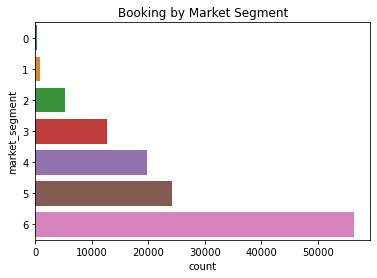

In [25]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

sns.countplot(y="market_segment", data=hotel_bookings_transform)
plt.title("Booking by Market Segment")

### 2. Customer type
- 0 - Contract
- 1 - Group
- 2 - Transient
- 3 - Transient Party

Transient party guests usually are short-term stay with less than 10 nights and are the most dominant customer type. It is a bit surprisng to see the group and contract category being not as outstanding given that the dominant market segment for tour agents. 

##### Bookings By Customer Type

Text(0.5, 1.0, 'Bookings By Customer Type')

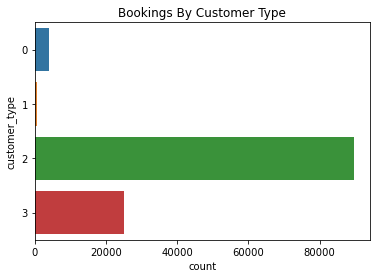

In [26]:
sns.countplot(y="customer_type", data=hotel_bookings_transform)
plt.title("Bookings By Customer Type")

### 3. Meals
- 0 - Undefined/SC – no meal package
- 1 - BB – Bed & Breakfast
- 2 - HB – Half board (breakfast and one other meal – usually dinner
- 3 - FB – Full board (breakfast, lunch and dinner)

It is interesting to see that no meal package was the most dominant category. There is a strong need to study the relationship among meals and our target variables (cancellation and ADR). 

##### Bookings by Meals

Text(0.5, 1.0, 'Bookings by Meals')

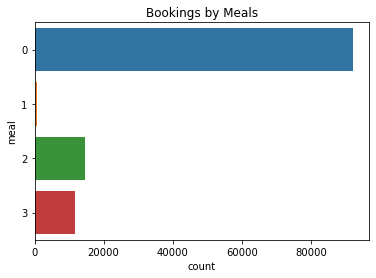

In [27]:
sns.countplot(y="meal", data=hotel_bookings_transform)
plt.title("Bookings by Meals")

#### 4. Arrival date month

It is the peak during the summer time and not as busy during the winter season. It will be interesting to see how this seasonality affects cancellation. 

##### Bookings by Month

Text(0.5, 1.0, 'Bookings by Month')

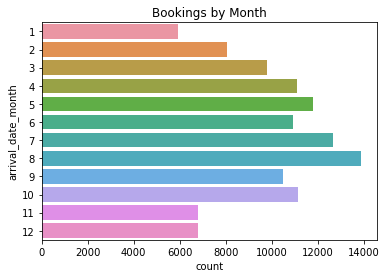

In [28]:
sns.countplot(y="arrival_date_month", data=hotel_bookings_transform)
plt.title("Bookings by Month")

#### 5. Reserved room type and Assigned room type

- 0 - A
- 1 - B
- 2 - C
- 3 - D
- 4 - E
- 5 - F
- 6 - G
- 7 - H
- 8 - I
- 9 - J

Code is presented for anonymity reason, however this can be a great pair of dataset to see how the discrepancy between the room types affect cancellation and even ADR. Guests tend to not like surprises when it comes to hotel bookings and it might result in cancellations. 

##### Bookings by Reserved Room Type

Text(0.5, 1.0, 'Bookings by Reserved Room Type')

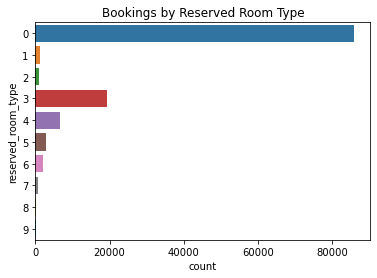

In [29]:
sns.countplot(y="reserved_room_type", data=hotel_bookings_transform)
plt.title("Bookings by Reserved Room Type")

##### Bookings by Assigned Room Type

Text(0.5, 1.0, 'Bookings by Assigned Room Type')

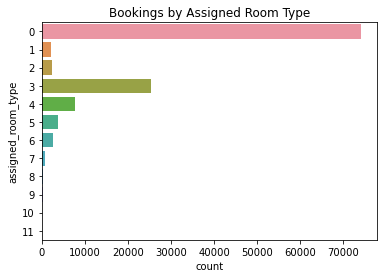

In [30]:
sns.countplot(y="assigned_room_type", data=hotel_bookings_transform)
plt.title("Bookings by Assigned Room Type")

# Explore Joint Attributes <a id='explore-joint-attributes'/>

First we decided to look into correlation for both continuous and categorical variables using heatmap, below you'll find the correlation plot we generated, based on that we have concluded the following:

#### Correlation Heatmap of Attributes

- Since we transformed the majority of categorical variables into numbers, we were able to compare them with continuous variables. 
- Stays_in_week_nights and Stays_in_weekend_nights are highly correlated : The more days you stay during the week, the more likely you will likely spend the weekend as well
- ADR and children, adults are also correlated. The higher the number of people are staying, the higher the rates go up. 
- Days in waiting_list and lead_time are correlated as customers always have to wait on their booking to be confirmed and take an action on whether to show up or not from then on.
- Reserved and assigned room types are highly correlated yet it is not 100% correlated. It will be interetesting to investigate this discrepancy and how it affects the probability of cancellation. 

Text(0.5, 1.0, 'Correlation Heat Map')

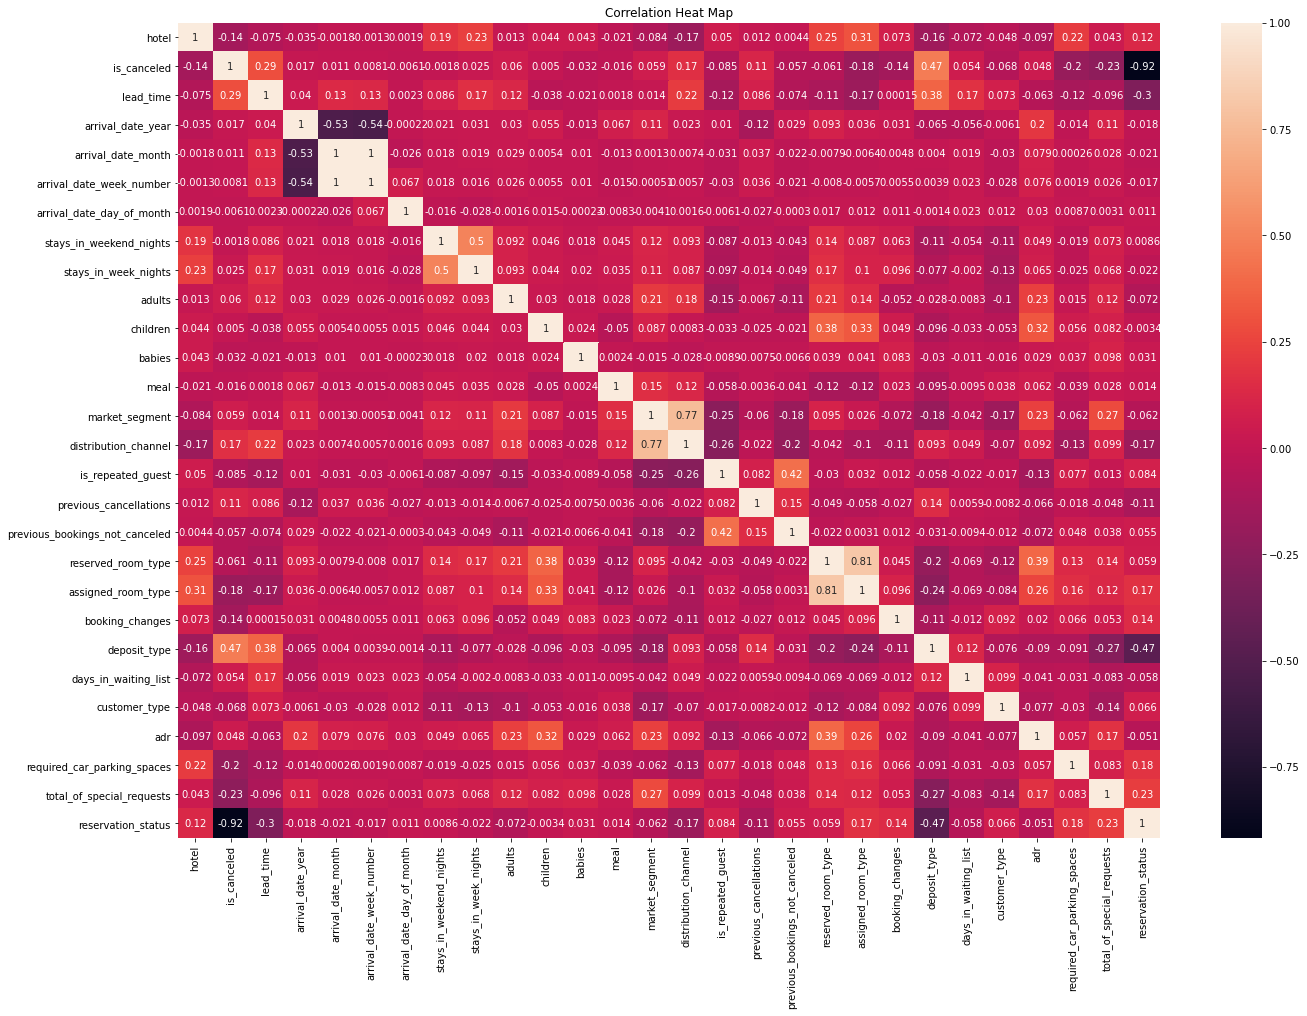

In [31]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(hotel_bookings_transform.corr(), annot=True, ax=ax);
plt.title("Correlation Heat Map")

#### Percentage of Cancellation by ADR Group


&emsp; One of the questions we wanted to get answers from this dataset is what are the predictors for a booking cancellation. To start we wanted to see if the Average Daily Rate (ADR) for a booking was a factor in cancelling a reservation. We decided to first break the reservations for each room into quartiles based on their ADR then look at the percentile that were cancelled by ADR quartile. Below you'll see the description of the labels we used to indicate each quartile:  


- Very Cheap- First Quartile
- Cheap- Second Quartile
- Expensive- Third Quartile
- Very Expensive- Fourth Quartile

In [32]:
from scipy import stats
hotel_bookings_transform.adr.describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

From the barplot with adr group and the cancellation rate, we can see that as price increases the percentage of cancellation increase as well, but there are not much differences on cancellation between 'expensive' and 'very expensive' group. Percentage of non-cancellation rate decreases as the prices increases.

Text(0.5, 1.0, 'Percentage of cancellation by ADR Group')

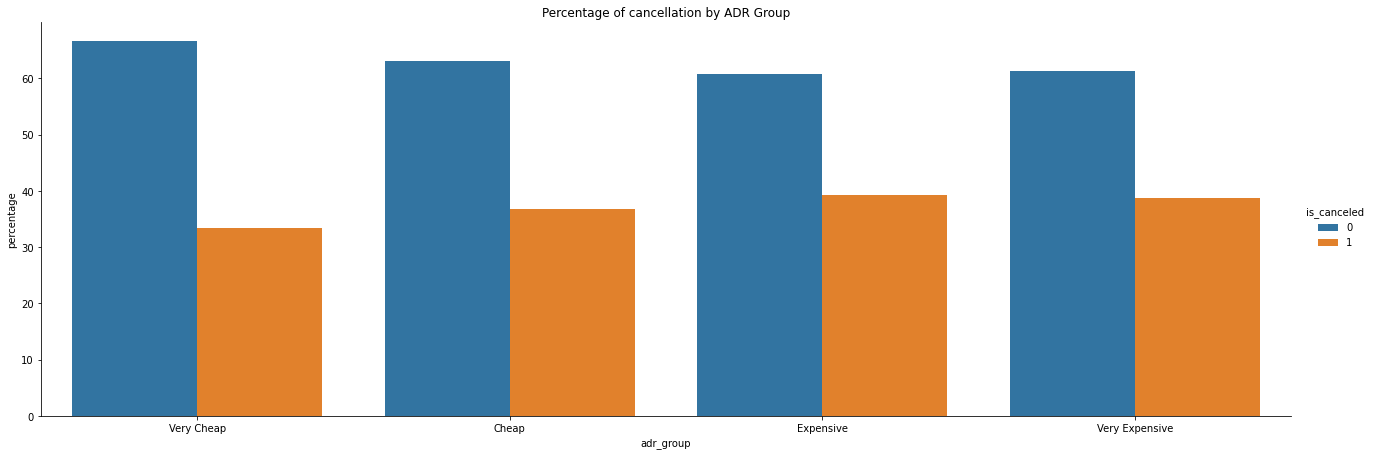

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

hotel_bookings_transform['adr_group'] = pd.cut(hotel_bookings_transform.adr,
                     bins=[-1, 69, 94, 126, 5400],
                     labels=["Very Cheap", "Cheap", "Expensive", "Very Expensive"])


(hotel_bookings_transform
.groupby('adr_group')['is_canceled']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='adr_group',y='percentage',hue='is_canceled',kind='bar', height=6, aspect=3))
plt.title("Percentage of cancellation by ADR Group")

#### Crosstab Children/Babies with Is_Canceled

 We ignored 0 as that means there are not any children nor babies. From the count plot, There are not that many cancellation when there are children or babies.

<AxesSubplot:xlabel='children,babies'>

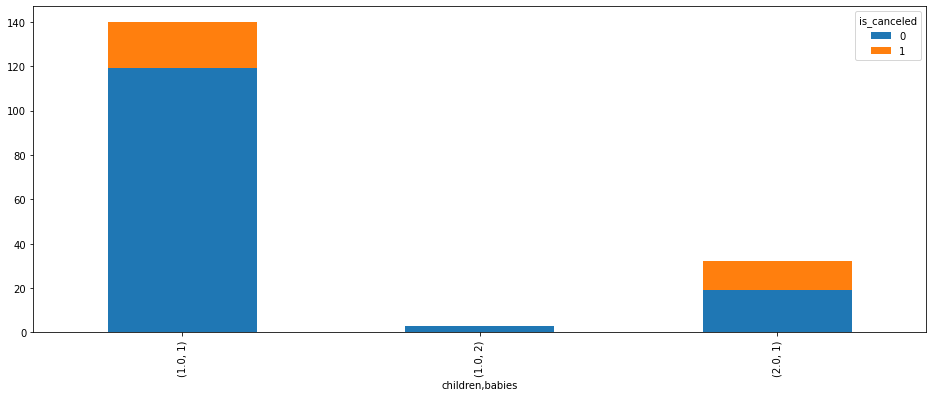

In [34]:
guests_counts = pd.crosstab([hotel_bookings_transform[hotel_bookings_transform['children'] > 0]['children'], hotel_bookings_transform[hotel_bookings_transform['babies'] > 0]['babies']], hotel_bookings_transform['is_canceled'])
guests_counts.plot(kind='bar', stacked=True, figsize=(16,6))

#### Crosstab Children/Babies with ADR

&emsp; When guests book hotel with children or babies, they tends to have higher adr. This might be due to seasonality that they booked during busy season or booked bigger rooms. To look into these attributes, we created joint stack bar plot for children and babies.

<AxesSubplot:xlabel='children,babies'>

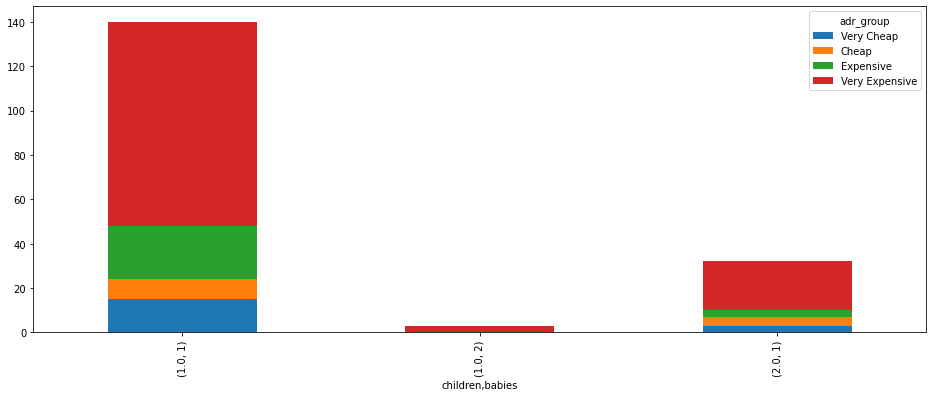

In [35]:

guests_counts = pd.crosstab([hotel_bookings_transform[hotel_bookings_transform['children'] > 0]['children'], hotel_bookings_transform[hotel_bookings_transform['babies'] > 0]['babies']], hotel_bookings_transform['adr_group'])
guests_counts.plot(kind='bar', stacked=True, figsize=(16,6))


#### Crosstab with Children/Babies with Assigned Room Type


&emsp;   We also look into the room type for children and babies. There are large number of room type 6. We can make assumption that this is bigger room as they are also expensive ADR from "Average ADR by Assigned Room type" plot.

<AxesSubplot:xlabel='children,babies'>

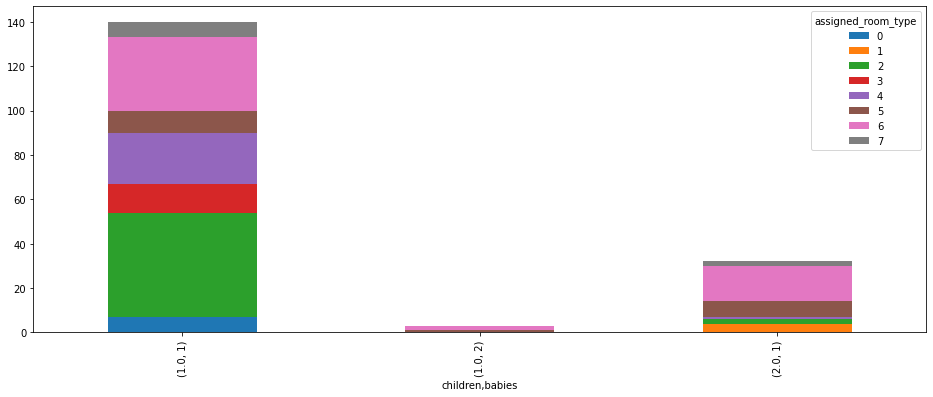

In [36]:

guests_counts = pd.crosstab([hotel_bookings_transform[hotel_bookings_transform['children'] > 0]['children'], hotel_bookings_transform[hotel_bookings_transform['babies'] > 0]['babies']], hotel_bookings_transform['assigned_room_type'])
guests_counts.plot(kind='bar', stacked=True, figsize=(16,6))

#### Crosstab for Is_Canceled and  Room Type

From the cancellation count plot, there are large number of both cancellation and non cancellation for room type 0 on both assigned and reserved room, second most booked room is room type 3.

<AxesSubplot:xlabel='assigned_room_type,reserved_room_type'>

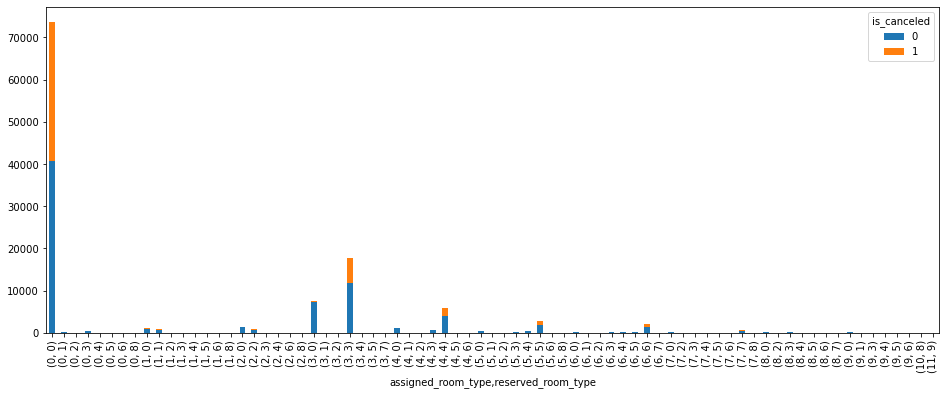

In [37]:
roomType_counts = pd.crosstab([hotel_bookings_transform['assigned_room_type'],hotel_bookings_transform['reserved_room_type']], hotel_bookings_transform['is_canceled'])
roomType_counts.plot(kind='bar', stacked=True, figsize=(16,6))

#### Crosstab for ADR and Reserved Room Type

From the ADR group count plot, room type 0 are quite evenly distributed, but for room type 3 there are more number of very expensive price than the other ADR groups.

<AxesSubplot:xlabel='assigned_room_type,reserved_room_type'>

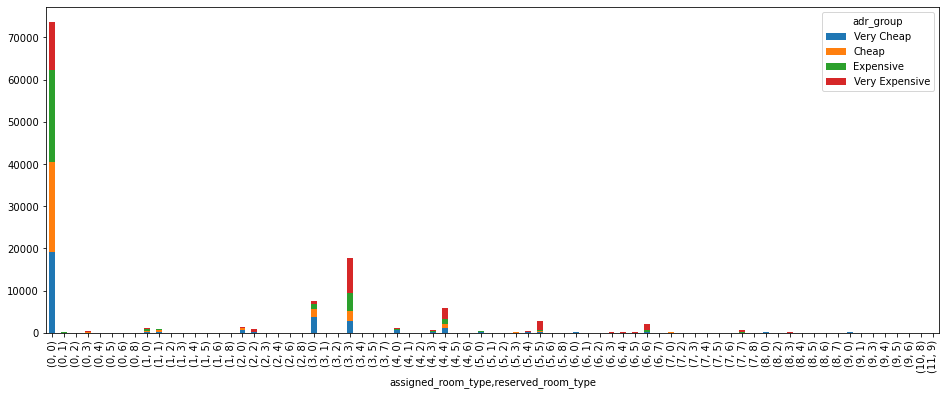

In [38]:
roomType_counts = pd.crosstab([hotel_bookings_transform['assigned_room_type'],hotel_bookings_transform['reserved_room_type']], hotel_bookings_transform['adr_group'])
roomType_counts.plot(kind='bar', stacked=True, figsize=(16,6))

### Pairwise table for pearson correlation
- The top 10 highly correlated pairs are organized in the following table in the descending order of adjusted R2. 
- Only the top 7 has adjusted r square value more than 0.5. These relationships will be further researched and employed for our model building. 
- The relationship between "adults" and "total_guests" has a way higher adj_r2 value(0.6742) than the one between "children" and "total_guests"(0.3356). It will be interesting to see at what age of children is counted as a guest, and thus affecting this discrepancy. 


In [39]:
import pingouin as pg
df=pg.pairwise_corr(hotel_bookings_transform, method='pearson')
output = df.sort_values(['adj_r2'], ascending=[0])
output.head(10)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
102,arrival_date_month,arrival_date_week_number,pearson,two-sided,119390,0.995105,"[1.0, 1.0]",0.990234,0.990234,3.005130,0.0,nan,1.0
52,is_canceled,reservation_status,pearson,two-sided,119390,-0.917196,"[-0.92, -0.92]",0.841248,0.841246,-1.571071,0.0,inf,1.0
333,reserved_room_type,assigned_room_type,pearson,two-sided,119390,0.814005,"[0.81, 0.82]",0.662604,0.662598,1.138786,0.0,inf,1.0
273,market_segment,distribution_channel,pearson,two-sided,119390,0.767784,"[0.77, 0.77]",0.589492,0.589485,1.014907,0.0,inf,1.0
79,arrival_date_year,arrival_date_week_number,pearson,two-sided,119390,-0.540561,"[-0.54, -0.54]",0.292207,0.292195,-0.604948,0.0,inf,1.0
78,arrival_date_year,arrival_date_month,pearson,two-sided,119390,-0.527739,"[-0.53, -0.52]",0.278508,0.278496,-0.587006,0.0,inf,1.0
168,stays_in_weekend_nights,stays_in_week_nights,pearson,two-sided,119390,0.498969,"[0.49, 0.5]",0.248970,0.248957,0.547932,0.0,inf,1.0
46,is_canceled,deposit_type,pearson,two-sided,119390,0.468634,"[0.46, 0.47]",0.219618,0.219605,0.508318,0.0,inf,1.0
362,deposit_type,reservation_status,pearson,two-sided,119390,-0.466185,"[-0.47, -0.46]",0.217328,0.217315,-0.505184,0.0,inf,1.0
301,is_repeated_guest,previous_bookings_not_canceled,pearson,two-sided,119390,0.418056,"[0.41, 0.42]",0.174771,0.174757,0.445334,0.0,inf,1.0


# Explore Attributes and Class <a id='explore-attributes-and-class'/>

### Room Type Analysis
&emsp; We analyzed the Room Type of guests' booking. Depending on room type, the price of booking may differ which can result in cancellations of booking. It is also possible that guests can cancel when they don't receive the originally booked room. We converted room type to integer value:
 - A: 0
 - B: 1
 - C: 2
 - D: 3
 - E: 4
 - F: 5
 - G: 6
 - H: 7
 - I: 8
 - J: 9
 - K: 10
 - L: 11


#####  Average ADR for room types
&emsp; We compare room types with ADR and found out room types 5-7 (F, G, H) have most expensive rate in average for both assigned and reserved room types. We also identified that assigned room 9, 10, and 11 were not actually reserved, and their prices are also very low compare to the others. The assumption we can make is that these rooms are small or in poor condition that hotel is moving to different rooms.

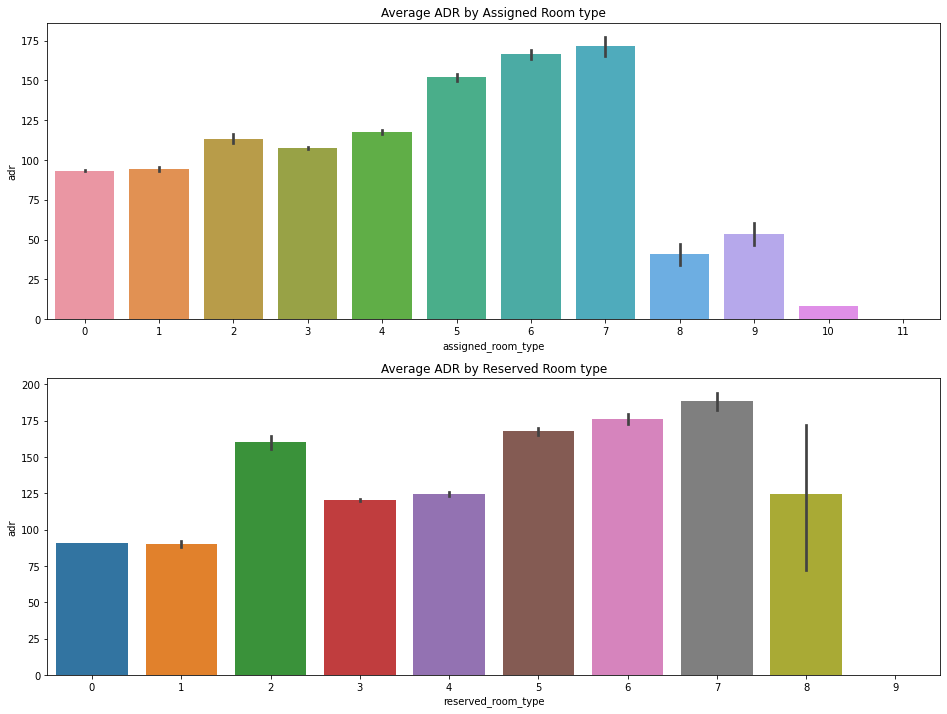

In [40]:
from numpy import mean

fig, axs = plt.subplots(nrows=2, figsize=(16,12))
sns.barplot(data=hotel_bookings_transform, x='assigned_room_type', y="adr", estimator=mean, ax=axs[0])
sns.barplot(data=hotel_bookings_transform, x='reserved_room_type', y="adr", estimator=mean, ax=axs[1])
axs[0].title.set_text("Average ADR by Assigned Room type")
axs[1].title.set_text("Average ADR by Reserved Room type")

##### Percentage of ADR Group for room types
&emsp; To furthur look into the ADR for each room types, we divided the ADR group. Room 5, 6, and 7 have significantly large number of very expensive group. From the price and ADR group, it seems room 5, 6, and 7 might have bigger size or have more luxury amenities. We do not have information on id mapping so we do not know why they are expensive. If we explore these attributes with other attributes, we can analyze deeper to understand such that if it is due to the size or the luxury

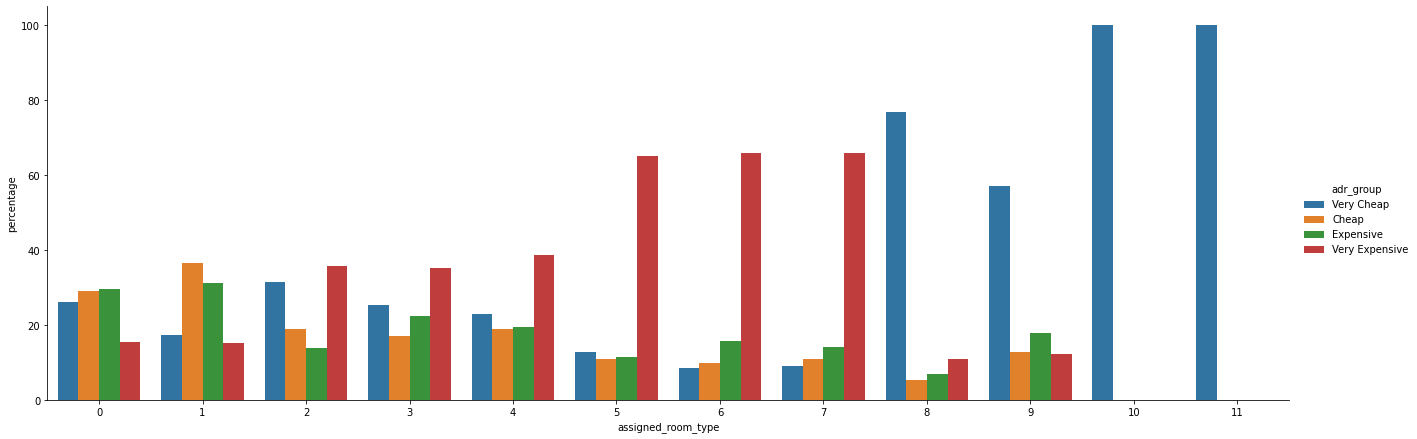

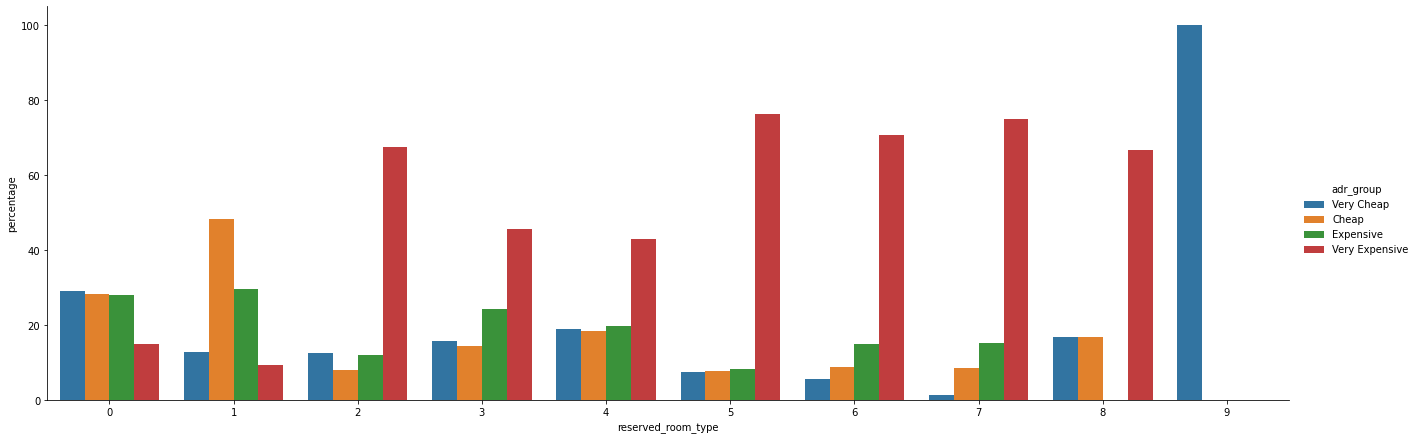

In [41]:
tempData1 = (hotel_bookings_transform
.groupby('assigned_room_type')['adr_group']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index())

tempData2 = (hotel_bookings_transform
.groupby('reserved_room_type')['adr_group']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index())

sns.catplot(data=tempData1, x='assigned_room_type', y="percentage", hue='adr_group',kind='bar', height=6, aspect=3)
sns.catplot(data=tempData2, x='reserved_room_type', y="percentage", hue='adr_group',kind='bar', height=6, aspect=3)

### Adults Analysis

&emsp; We also wanted to explore the relationship between number of guests and the price of the hotel booking. We looked into the adults, children, and babies attribute. There are more items to consider on booking when there are children or babies on their stays, which might affect the guests decision on booking or selecting right prices for their stays. 

##### Counts of cancellation by number of adult guests
&emsp;  This is count plot of adult guests with cancellation label. There large number of guests with two people, and majority of cancellation was from two adults.

Text(0.5, 1.0, 'Counts of cancellation by number of adult guests')

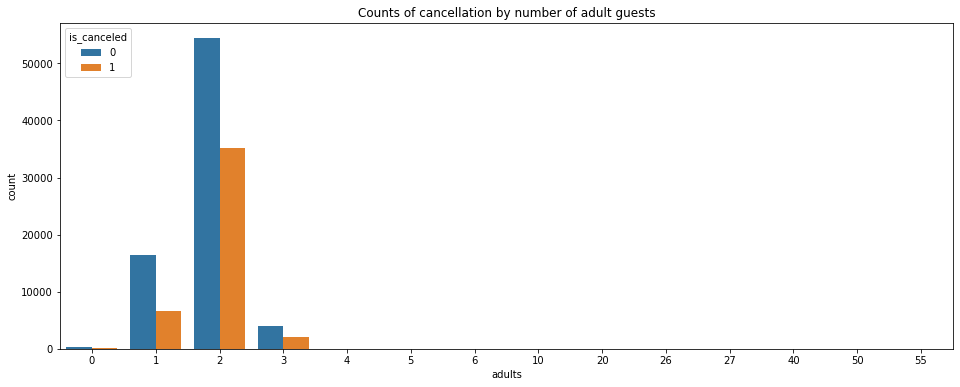

In [42]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="adults", hue="is_canceled")
plt.title("Counts of cancellation by number of adult guests")

##### Counts of ADR group by number of adult guests
&emsp; Then we look into the count of guests for each ADR group. As the number of guests increase, their price increases as well as there are more number of very expensive group. When there are only one guest, their hotel booking tends to look for cheaper price based on this chart. When there are 3 guests, their hotel booking tends to be very expensive. These results might be due to size of room or seasonality.

Text(0.5, 1.0, 'Counts of ADR group by number of adult guests')

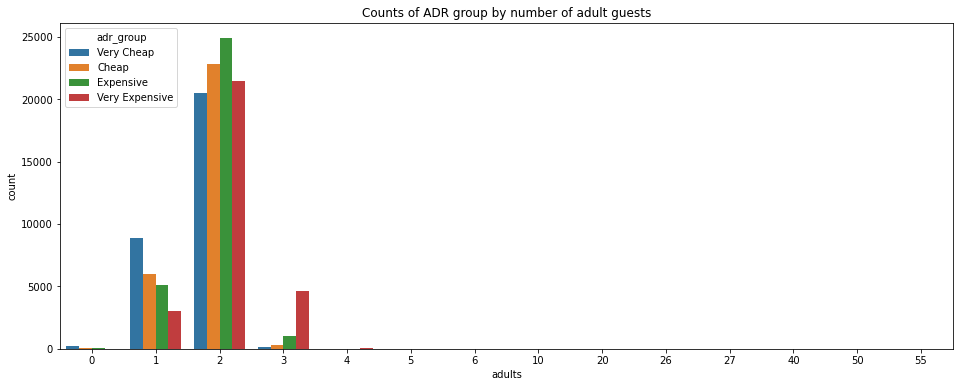

In [43]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="adults", hue="adr_group")
plt.title("Counts of ADR group by number of adult guests")

##### Percentage of ADR group by number of adult guests
&emsp; For the furthur analysis, we create percentage of each ADR group. From 0 to 4 guests, percentage of very expensive booking increases as the number of adult guests increases. Starting 5 guests, there are only very cheap prices. This meant guests might book through some kinds of deal or they book during slow season.

Text(0.5, 1.0, 'Percentage of ADR group by number of adult guests')

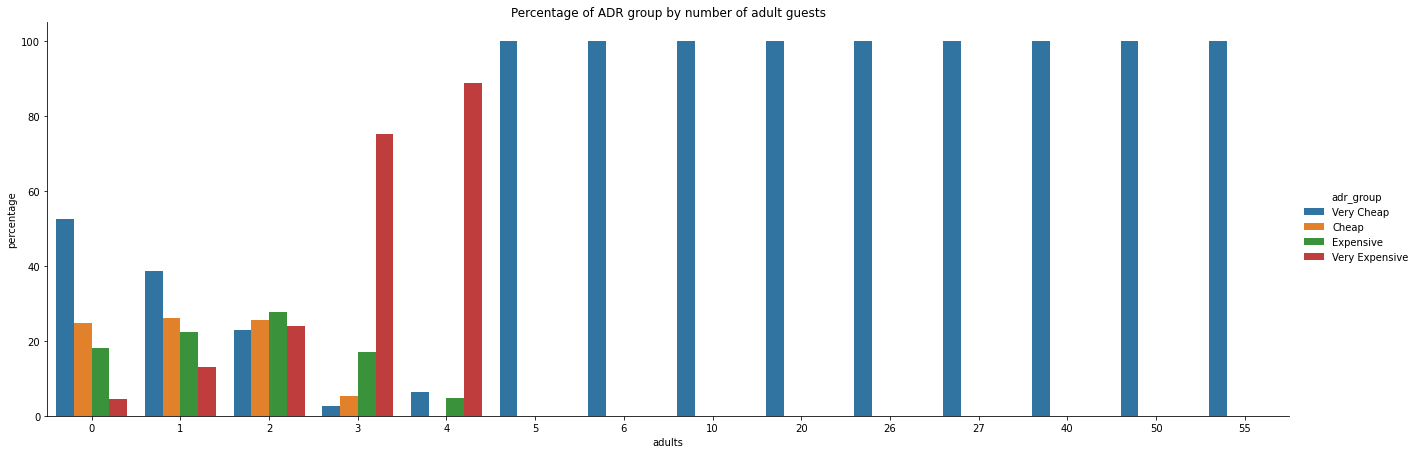

In [44]:
(hotel_bookings_transform
.groupby('adults')['adr_group']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='adults',y='percentage',hue='adr_group',kind='bar', height=6, aspect=3))
plt.title("Percentage of ADR group by number of adult guests")

##### Counts of cancellation by number of total guests
&emsp; We combined three attributes to create new feature called total_guests to analyze deeper. This is count plot of total guests with cancellation label. There large number of guests with two people, and majority of cancellation was from two guests.

Text(0.5, 1.0, 'Counts of cancellation by number of total guests')

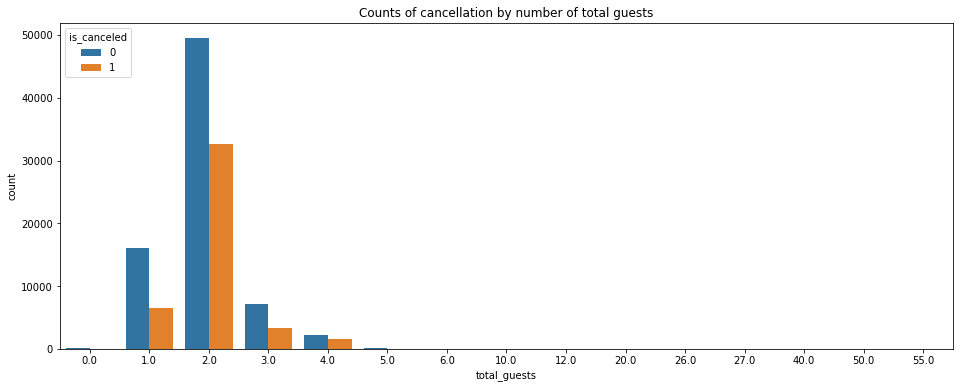

In [45]:
hotel_bookings_transform["total_guests"] = hotel_bookings_transform.adults + hotel_bookings_transform.children + hotel_bookings_transform.babies
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="total_guests", hue="is_canceled")
plt.title("Counts of cancellation by number of total guests")

##### Counts of ADR group by number of total guests
&emsp; Then we look into the count of guests for each ADR group. As the number of guests increase, their price increases as well as there are more number of very expensive group. When there are only one guest, their hotel booking tends to look for cheaper price based on this chart.

Text(0.5, 1.0, 'Counts of ADR group by number of total guests')

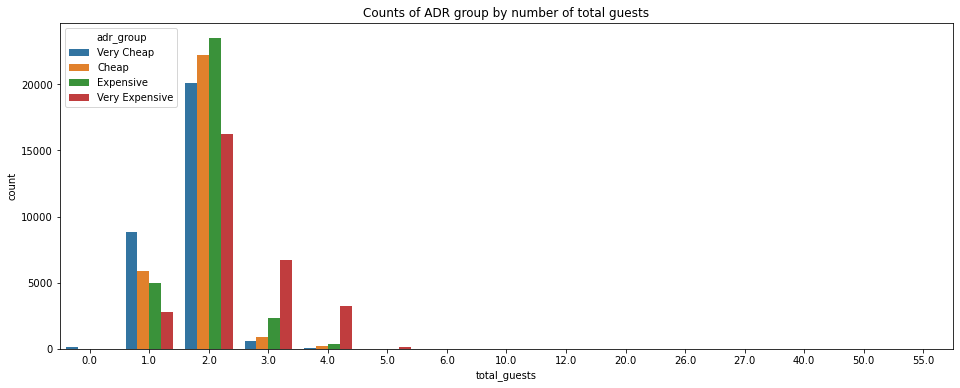

In [46]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="total_guests", hue="adr_group")
plt.title("Counts of ADR group by number of total guests")

##### Percentage of ADR group by number of total guests
&emsp; For the furthur analysis, we also create percentage of each ADR group same with adult guests. From 0 to 5 guests, percentage of very expensive booking increases as the number of total guests increases. Starting 6 guests, they are majority very cheap prices. This meant guests might book through some kinds of deal or they book during slow season. There are difference that when there are 12 guests, their booking price are expensive. This might be due to number of children.

Text(0.5, 1.0, 'Percentage of ADR group by number of total guests')

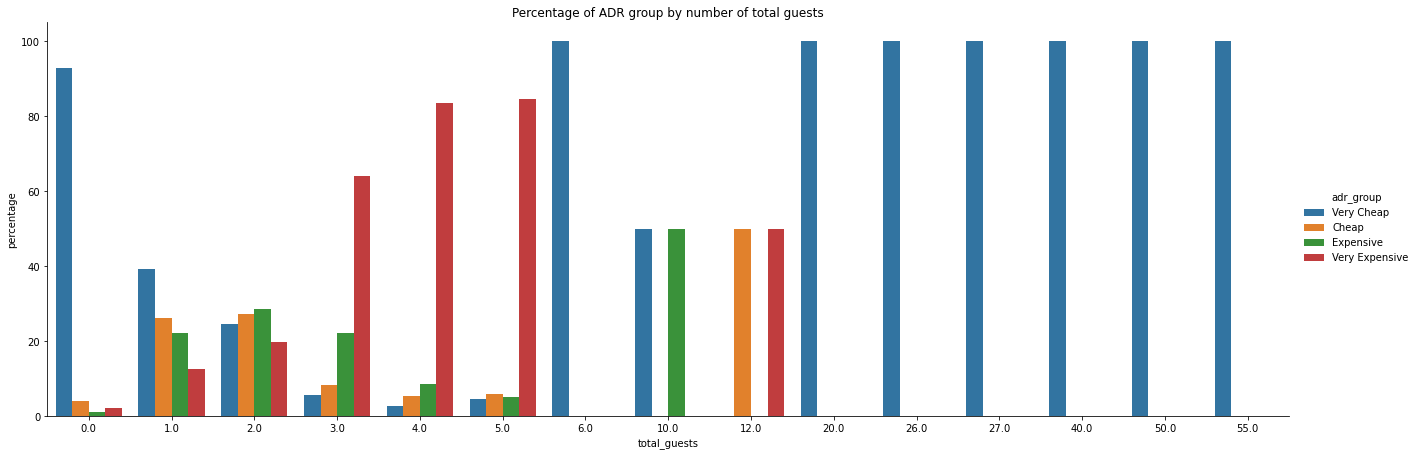

In [47]:
hotel_bookings_transform["total_guests"] = hotel_bookings_transform.adults + hotel_bookings_transform.children + hotel_bookings_transform.babies
(hotel_bookings_transform
.groupby('total_guests')['adr_group']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='total_guests',y='percentage',hue='adr_group',kind='bar', height=6, aspect=3))
plt.title("Percentage of ADR group by number of total guests")

##### Total Guests vs Assigned Room Type
&emsp; We also look into the room type in order to understand if there is relationship between room type and number of guests. From 1 to 5 guests, guests look for higher room type as number of guests increases. From "Counts of ADR group by number of total guests" plot, when there is only one guest, there are larger number of booking with lower rates. We can assume that the when there are less than 3 guests, the booking will be cheaper, such as room type A. From the chart of "Total Guests vs Assigned Room Type", we can confirm our assumption. When there are more than 3 people, their booking prices get more expensive and their assigned room also is better.

Text(0.5, 1.0, 'Total Guests vs Assigned Room Type')

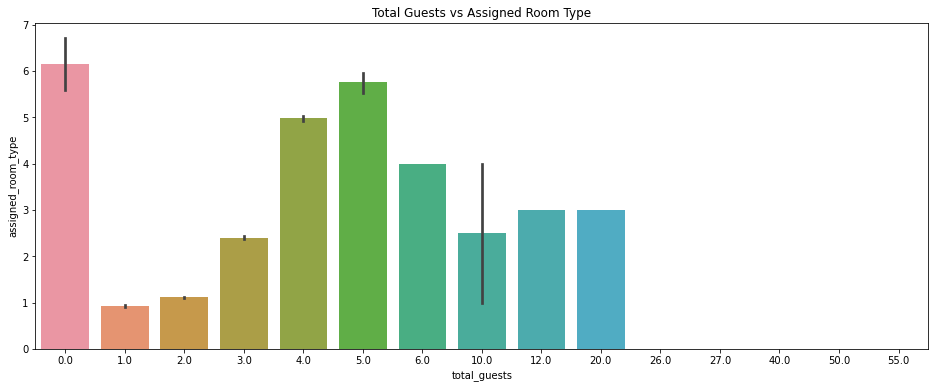

In [48]:
plt.figure(figsize=(16,6))
sns.barplot(data=hotel_bookings_transform, x="total_guests", y="assigned_room_type")
plt.title("Total Guests vs Assigned Room Type")

### Booking Date Analysis

&emsp; We want to analyze the trends of hotel prices or average daily rate (__ADR__) and __cancellation__ rate on booking date. With information on trends over time, we are able to explore analysis on seasonal data. We observed the average __ADR__ for each year and months to identify the general trends over time.

##### Average ADR Over Years

&emsp; This is a bar chart of adr for each years. The average booking prices increased over year.

Text(0.5, 1.0, 'Average ADR over years')

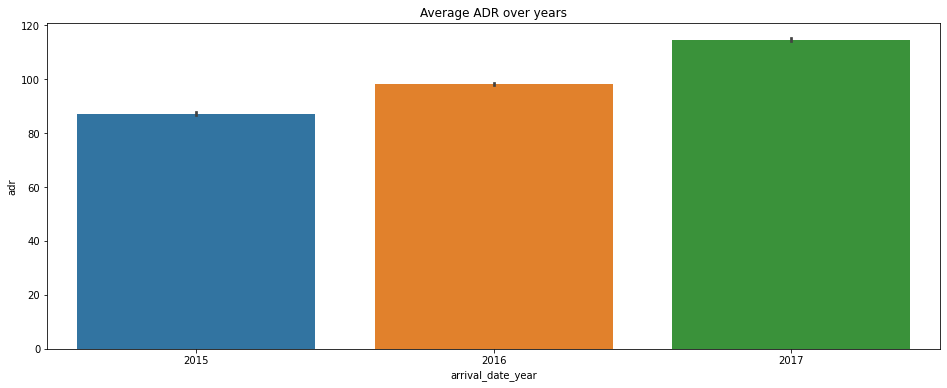

In [49]:
plt.figure(figsize=(16, 6))
sns.barplot(data=hotel_bookings_transform, x='arrival_date_year', y="adr", estimator=mean)
plt.title("Average ADR over years")

##### Average ADR over year of Cancellation

&emsp; This is a bar chart of adr for each years. The average booking prices increased over year. We also add cancellation class for label. Since 2016, cancelled booking has higher adr in average.

Text(0.5, 1.0, 'Average ADR over years of Cancellation')

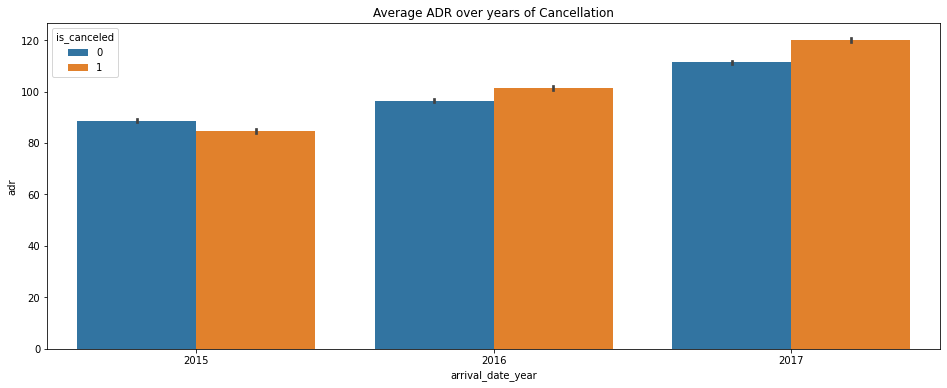

In [50]:
plt.figure(figsize=(16, 6))
sns.barplot(data=hotel_bookings_transform, x='arrival_date_year', y="adr", estimator=mean, hue="is_canceled")
plt.title("Average ADR over years of Cancellation")

#### Booking Date - Month

&emsp; To get more insights for seasonality, we ran the visual analysis that looked at monthly aggregations for each year we had data for.  We calculated the total stays by summing up the stays in weekends and weekdays to get the total stays per observation. We examined the average booking price and average duration of stay for each month over the year. 

##### Average ADR for each Months
&emsp; We first apply average ADR on the bar plot for each month. From January to August, average ADR increases then it starts decrease. From June to August, the average booking prices was much higher than the other months. We can assume that this is peak season, and the hotels tended to increase durin these months.

Text(0.5, 1.0, 'Average ADR for each Months')

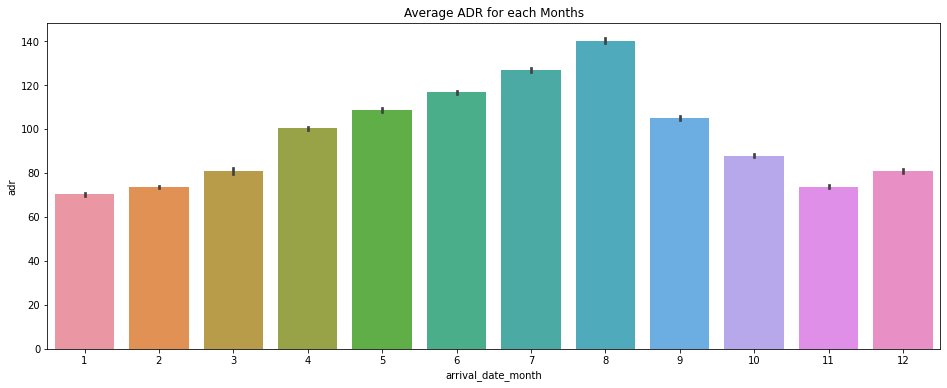

In [51]:
plt.figure(figsize=(16, 6))
sns.barplot(data=hotel_bookings_transform, x='arrival_date_month', y="adr", estimator=mean)
plt.title("Average ADR for each Months")

##### Counts of cancellation for each months
&emsp; From this count plot of cancellation for each month, it appears that there are higher number of bookings during July and August as both counts of canceled and non-canceled booking are the highest. From April to October, it seems to have similar number of cancellation.

Text(0.5, 1.0, 'Counts of cancellation for each months')

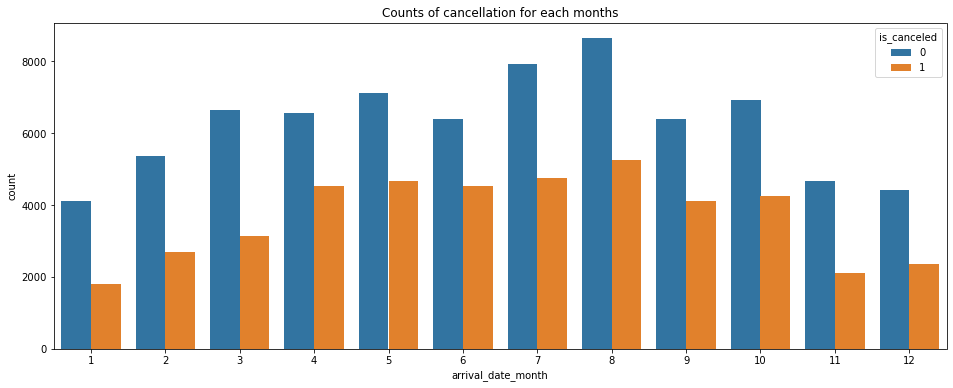

In [52]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="arrival_date_month", hue="is_canceled")
plt.title("Counts of cancellation for each months")

##### Percentage of cancellation for each months
&emsp; We then calculate the percentage of cancellation for each month to analyze the trends of cancellation. From November to March, it appears to have about 2 to 1 ratio between non-cancellation and cancellation, but from April to October, the percentage of cancellation increases. During winter season, there are smaller number of booking and their cancellation rates are lower.

Text(0.5, 1.0, 'Percentage of cancellation for each months')

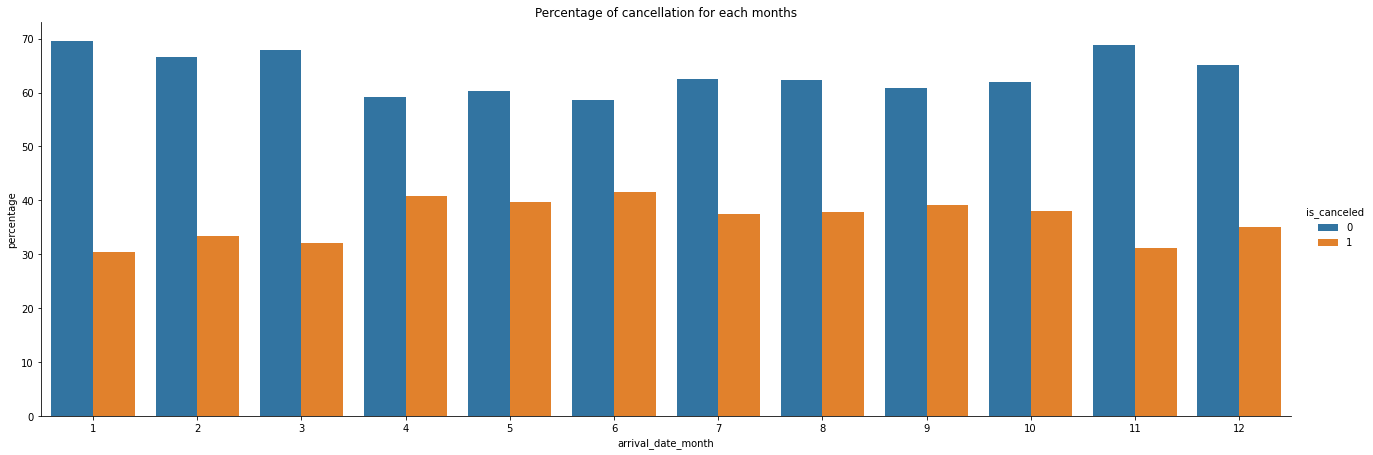

In [53]:
(hotel_bookings_transform
.groupby('arrival_date_month')['is_canceled']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='arrival_date_month',y='percentage',hue='is_canceled',kind='bar', height=6, aspect=3))
plt.title("Percentage of cancellation for each months")

##### Average ADR of every months for each year
&emsp; To analyze the monthly booking, we divided the bar plot for each year. Although some of data on months are not provided from the dataset, we can identify the trends from the bar plot of average ADR of months for each year. From January to August, the booking price increases and starts to decrease on September. Also over the year, average ADR of each months also increased that average ADR of 2017-08 has the highest ADR. Even for the winter season, 2017 has the highest average ADR. During the summer, booking prices are increases and every year the booking prices increases as well. We are able to explore the trends for each months as well as years from this chart.

Text(0.5, 0.98, 'Average ADR of every months for each year')

<Figure size 1152x432 with 0 Axes>

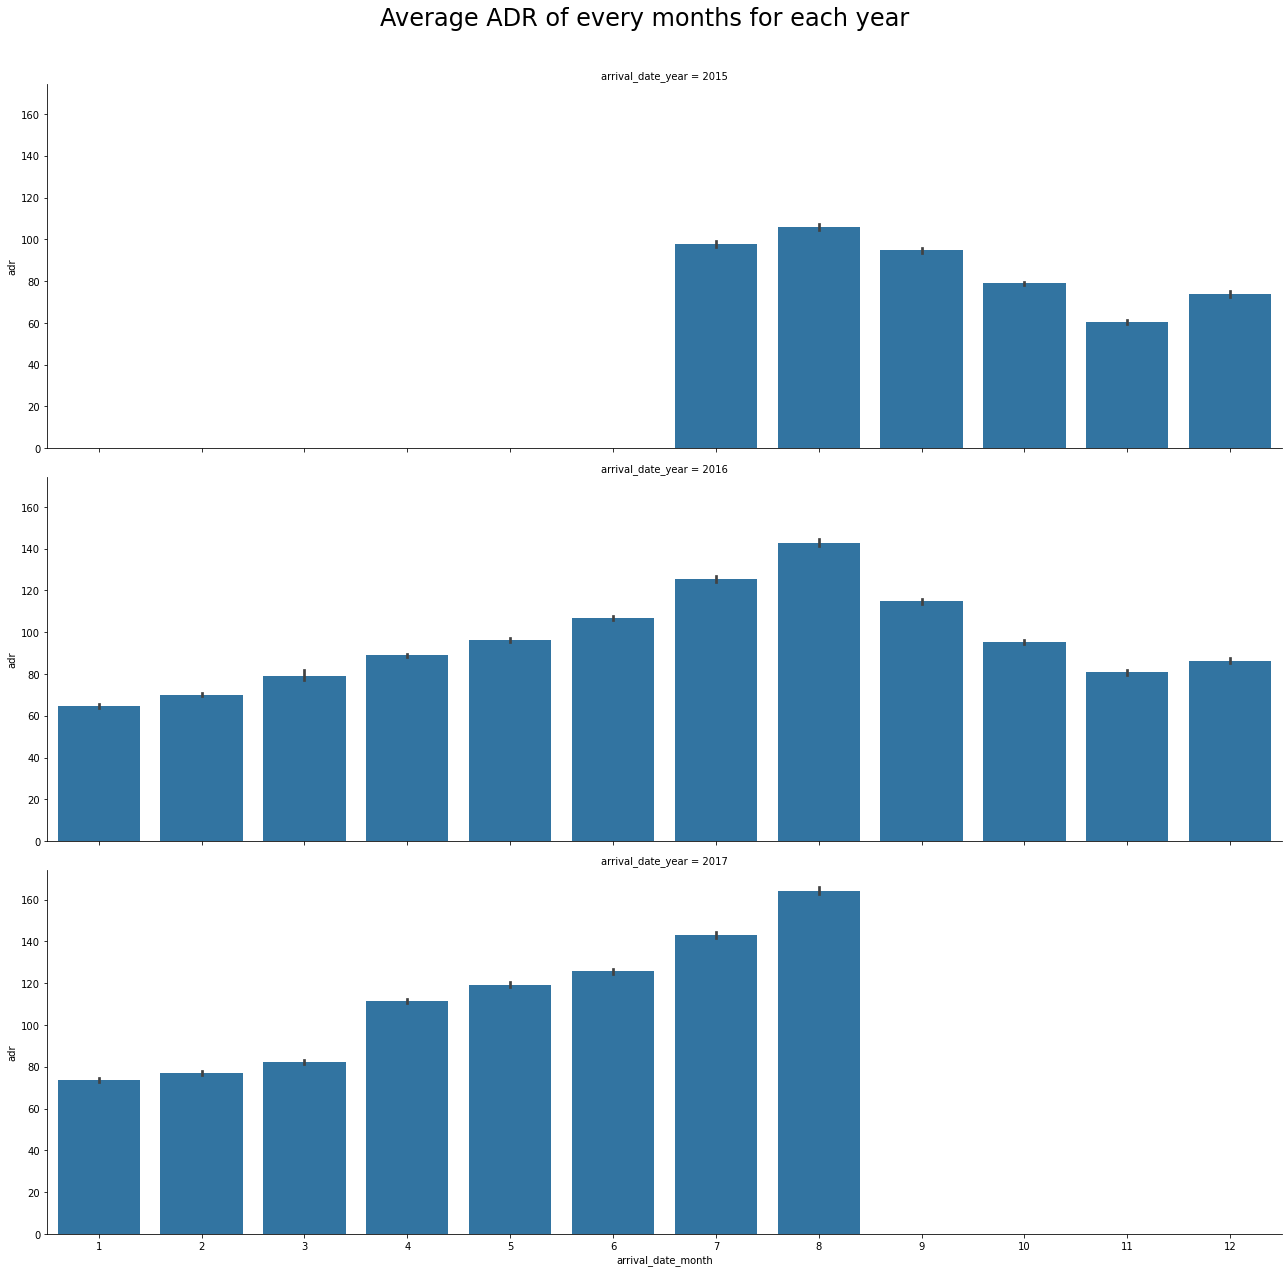

In [54]:
fig = plt.figure(figsize=(16, 6))
g = sns.FacetGrid(hotel_bookings_transform, row="arrival_date_year", height=6, aspect=3)
g.map(sns.barplot, "arrival_date_month", "adr", order=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Average ADR of every months for each year", fontsize=24)

##### Duration of Stays from 2015 to 2017
&emsp; Duration of stays might affect the changes of the average ADR over time, so we generate new attribute called total_stays to analyze the trends of duration of stays over time. The outcome of the bar plot came out to be very similar with the that of average ADR that duration of stays increase from January to August, and then it starts to decrease on September. For the year comparison, the average duration of stays on July and August for each years are not much different. From this plot, we can assume the trends of average adr on month of booking may be relate to the duration of stays, but trends on year of booking may not be affected by the duration of stays.

Text(0.5, 0.98, 'Duration of Stays from 2015 to 2017')

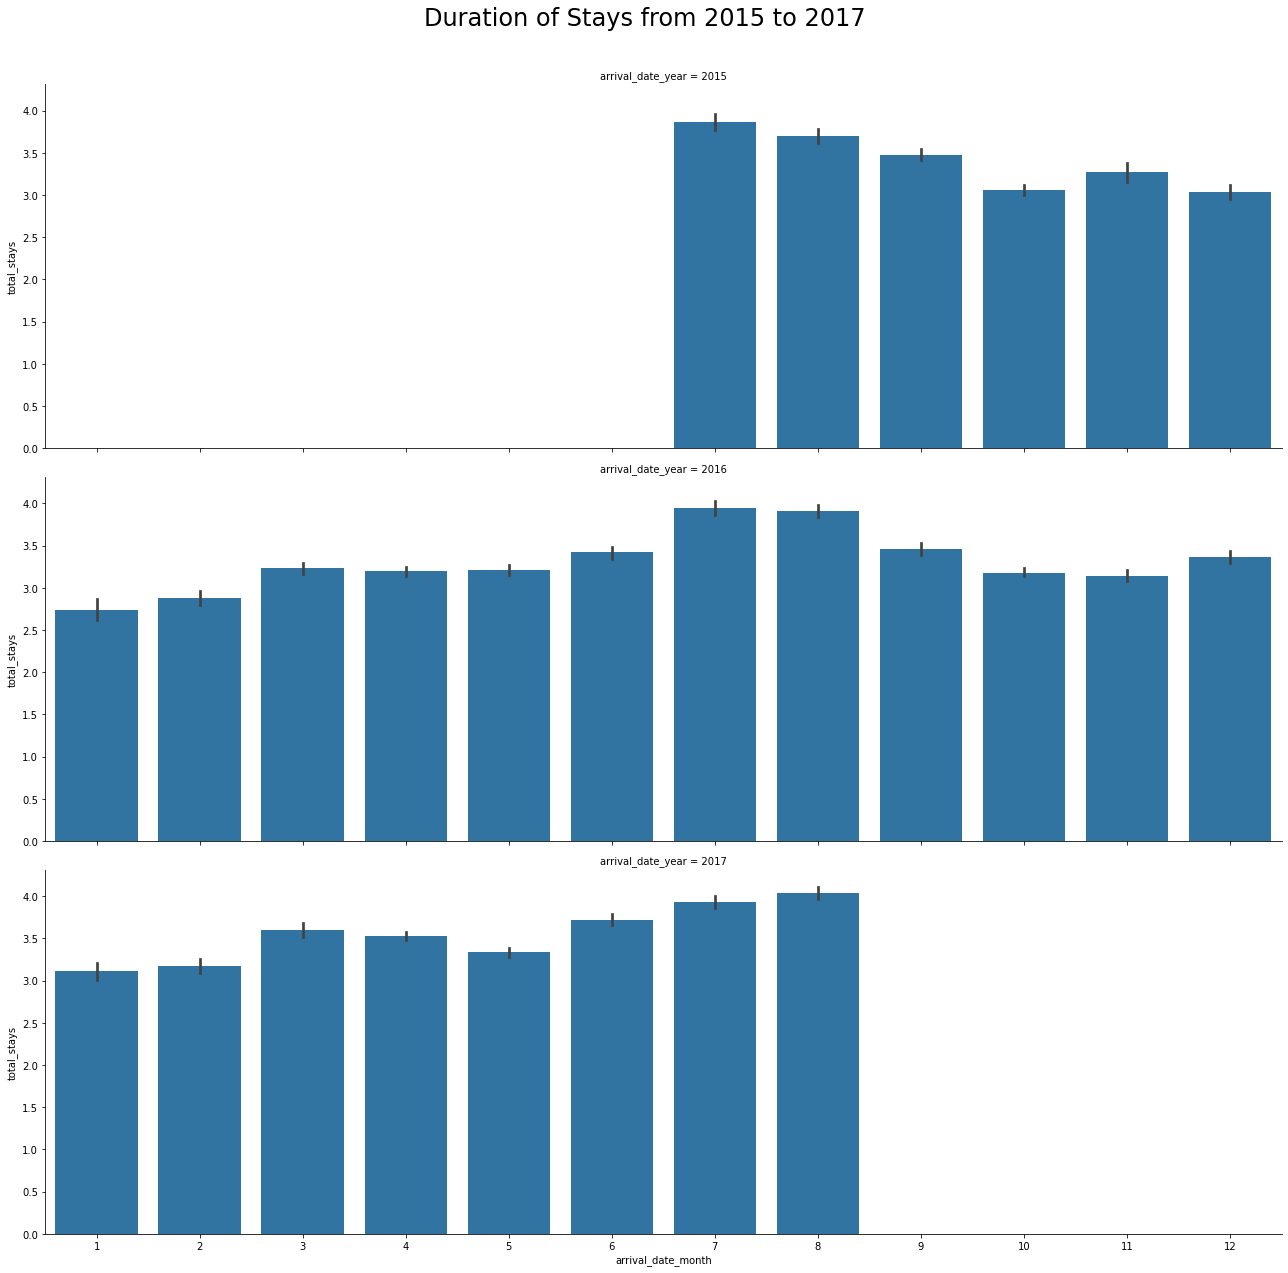

In [55]:
hotel_bookings_transform["total_stays"] = hotel_bookings_transform.stays_in_week_nights + hotel_bookings_transform.stays_in_weekend_nights
g = sns.FacetGrid(hotel_bookings_transform, row="arrival_date_year", height=6, aspect=3)
g.map(sns.barplot, "arrival_date_month", "total_stays", order=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Duration of Stays from 2015 to 2017", fontsize=24)

### Timeseries

&emsp; We created timeseries graphs on the average ADR, rate of cancellation, number of guests, and duration of stays to investigate the general trends of attributes over the time. Timeseries information gave important insights on changes of attributes for each season.

In [56]:
df2 = hotel_bookings_transform[["arrival_date_year", "arrival_date_month"]].copy()
df2.columns = ["year", "month"]
df2
hotel_bookings_transform['booking_date_noDate']=pd.to_datetime(df2['year'].astype(str)  + df2['month'].astype(str), format='%Y%m')

##### Timeseries of Average ADR
&emsp; From the timeseries of average ADR, we identified that during winter season the average price of hotel significantly dropped, but during summer season (June-August) it showed the opposite result. Then when it goes to 2017, it shows similar trends that during winter season, average ADR droped then gradually increased when it comes to summer season. Thus we can see summer is the peak season for the hotel booking.

Text(0.5, 1.0, 'Timeseries of Average ADR')

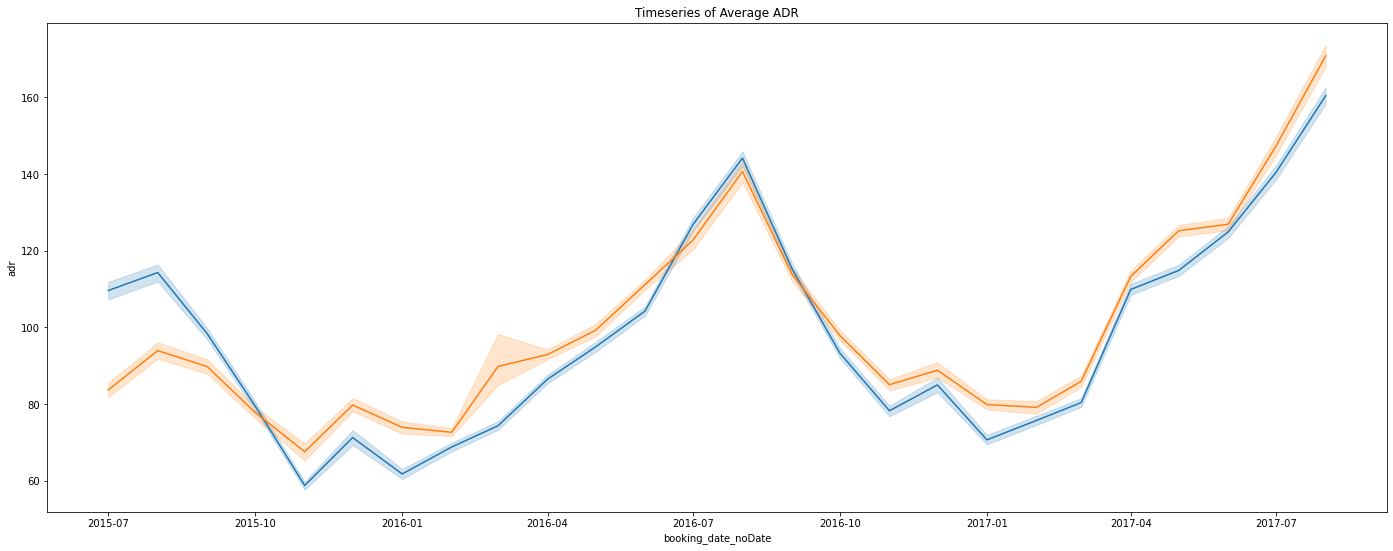

In [57]:
plt.figure(figsize=(24, 9))
sns.lineplot(data=hotel_bookings_transform[hotel_bookings_transform["is_canceled"] == 0], x="booking_date_noDate", y='adr', estimator=mean)
sns.lineplot(data=hotel_bookings_transform[hotel_bookings_transform["is_canceled"] == 1], x="booking_date_noDate", y='adr', estimator=mean)
plt.title("Timeseries of Average ADR")

##### Number of guests over time from 2015 to 2017
&emsp; Secondly, we explore the average number of guests over time. The timeseries of number of guests was displayed very similar with the timeseries of average adr that during winter there are small number of guests in average then more guests in summer. Thus we can have assumption that numbert of guests are average adr might be related. There are more average number of guests in winter of 2017 then the that of 2016.

Text(0.5, 1.0, 'Number of guests over time from 2015 to 2017')

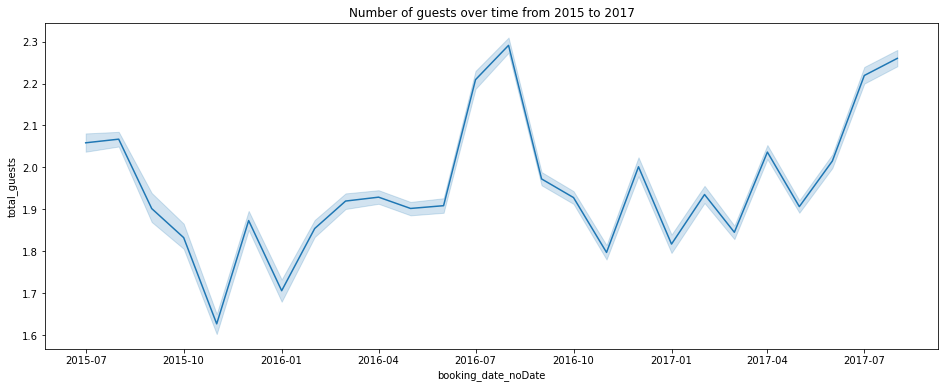

In [58]:
plt.figure(figsize=(16,6))
sns.lineplot(data=hotel_bookings_transform, x="booking_date_noDate", y='total_guests', estimator=mean)
plt.title("Number of guests over time from 2015 to 2017")

##### Average Duration of Stays over year from 2015 to 2017
&emsp; Then we moved on to the next attribute, total stays, to explore the trends. The graph came out to be very similar with the timeseries with average number of guests. Interesting analysis we found is that lowest point of total stays is on 2016-01 but in timeseries on number of guests lowest point is on 2015-11. We may make an assumption, that guests stayed more during November maybe due to the thanskgiving. We can explore this deeply by looking into the graph with date on it.

Text(0.5, 1.0, 'Average Duration of Stays over year from 2015 to 2017')

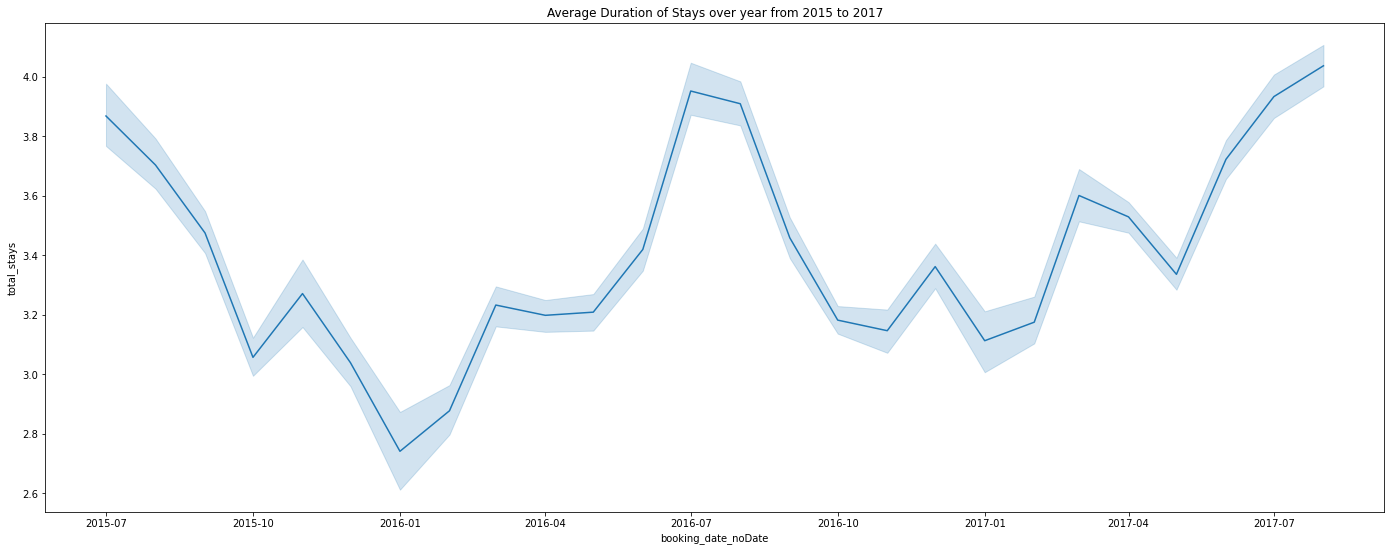

In [59]:
plt.figure(figsize=(24, 9))
sns.lineplot(data=hotel_bookings_transform, x="booking_date_noDate", y='total_stays', estimator=mean)
plt.title("Average Duration of Stays over year from 2015 to 2017")

##### Number of cancellation over time from 2015 to 2017
&emsp; Lastly, we explore the cancellation rate over time so we can compare its graph with other timeseries to understand the trends in deeper. 2015-11 was the lowest point that guests did not canceled with only around 20%. If this timeseries follow the same trends with the others, we should expect high number of cancellation in summer. However during the summer season, the cancellation rate was not the highest point but in the 2017-05. From this graph and other timeseries of average adr, number of guests, and number of stays. We may make an assumption that guests do not cancel their booking because there are not much rooms to book again after cancellation as it is the peak season.

Text(0.5, 1.0, 'Number of cancellation over time from 2015 to 2017')

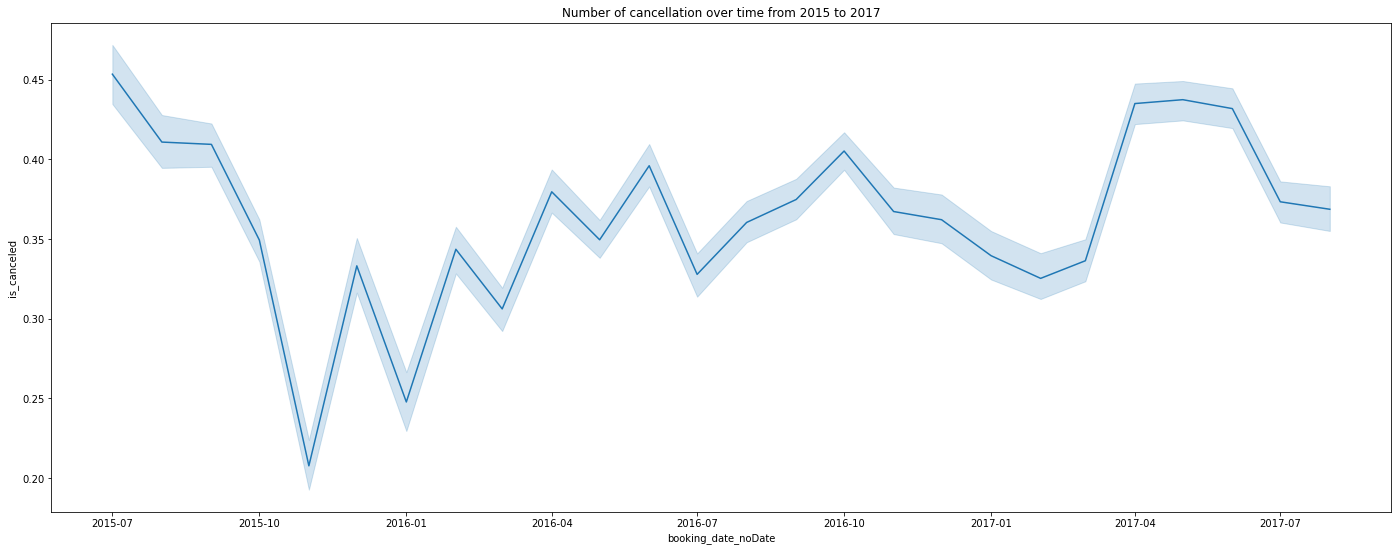

In [60]:
plt.figure(figsize=(24, 9))
sns.lineplot(data=hotel_bookings_transform, x="booking_date_noDate", y="is_canceled", estimator=mean)
plt.title("Number of cancellation over time from 2015 to 2017")

### Deposit Type Analysis

&emsp; We also explored the relationship between deposit type and cancellation. When there was a refundable option on booking, the guests have less difficulty in cancelling their booking. It can be an important attribute to predict the cancellation. The label of deposit type is
 - 0 : No Deposit
 - 1 : Non Refund
 - 2 : Refundable

##### Number of cancellation by deposit type
&emsp; We first explore the count of deposit type using count plots. From the count plot, we identified most of bookings are from no deposit type. Distribution of types are highly biased to no deposit type. There are good number of canceled booking on non refunded type, and very small number of refundable type.

Text(0.5, 1.0, 'Number of cancellation by deposit type')

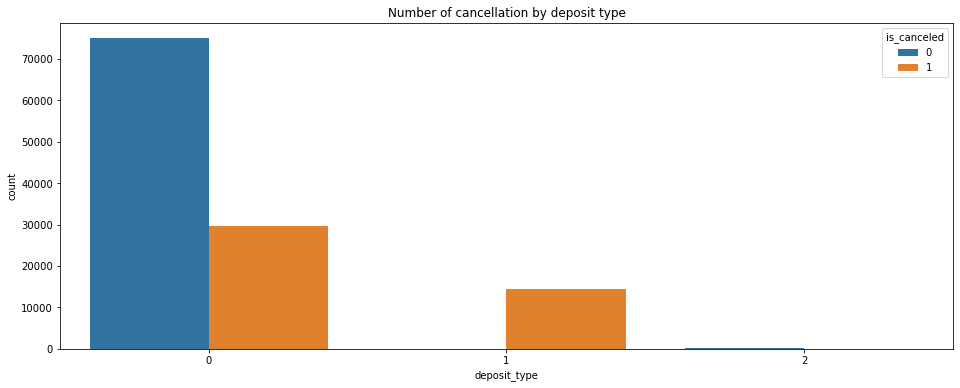

In [61]:
plt.figure(figsize=(16, 6))
sns.countplot(data=hotel_bookings_transform, x='deposit_type', hue="is_canceled")
plt.title("Number of cancellation by deposit type")

##### Percentage of cancellation by deposit type
&emsp; To understand deeply on the counts of deposit type on cancellation, we looked into the cancellation percentage. For the cancellation rate, we used countplot after calculating the percentage of each labels of attributes. We originally expected there will be more cancellation on refundable booking. However, interestingly, there are higher percentages of cancellation on Non Refund than the Refundable booking.

Text(0.5, 1.0, 'Percentage of cancellation by deposit type')

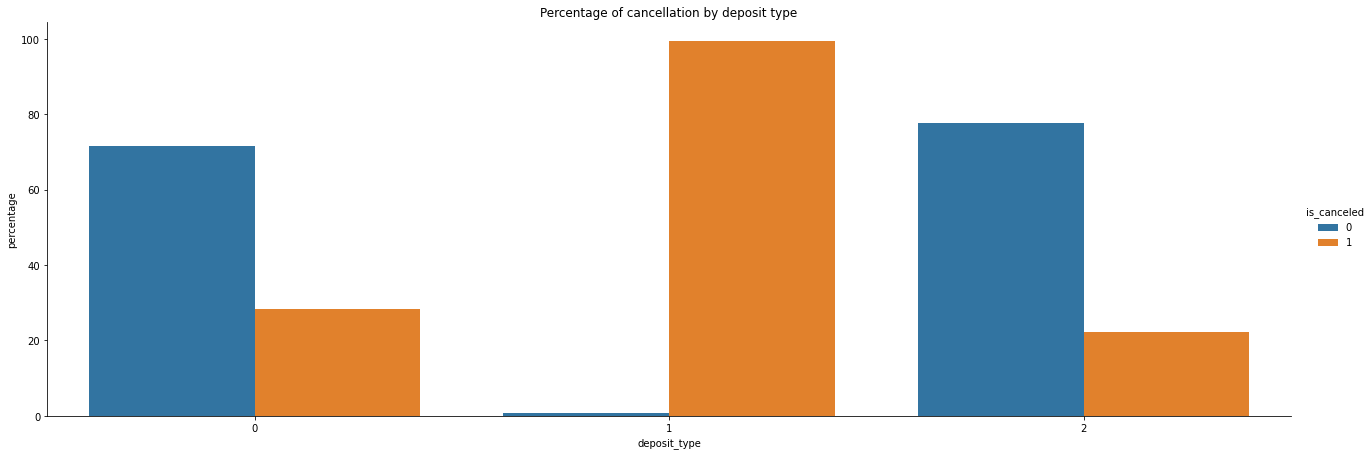

In [62]:
(hotel_bookings_transform
.groupby('deposit_type')['is_canceled']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='deposit_type',y='percentage',hue='is_canceled',kind='bar', height=6, aspect=3))
plt.title("Percentage of cancellation by deposit type")

##### Percentage of ADR Group by deposit type
&emsp; For the furthur analysis, we also applied adr group to analyze the price range on each deposit type. Above bar plot display the percentage of adr groups for each deposit types. No Deposit type has similar percentage on each adr group but has slight more on expensive price ranges than the cheaper price. For non refunded type, there are more number of cheaper price than the expensive price, and we can assume there are lots of cancellation on non refunded type may be due to the cheap price of booking. For refundable type, most of bookings are from cheaper prices.

Text(0.5, 1.0, 'Percentage of ADR Group by deposit type')

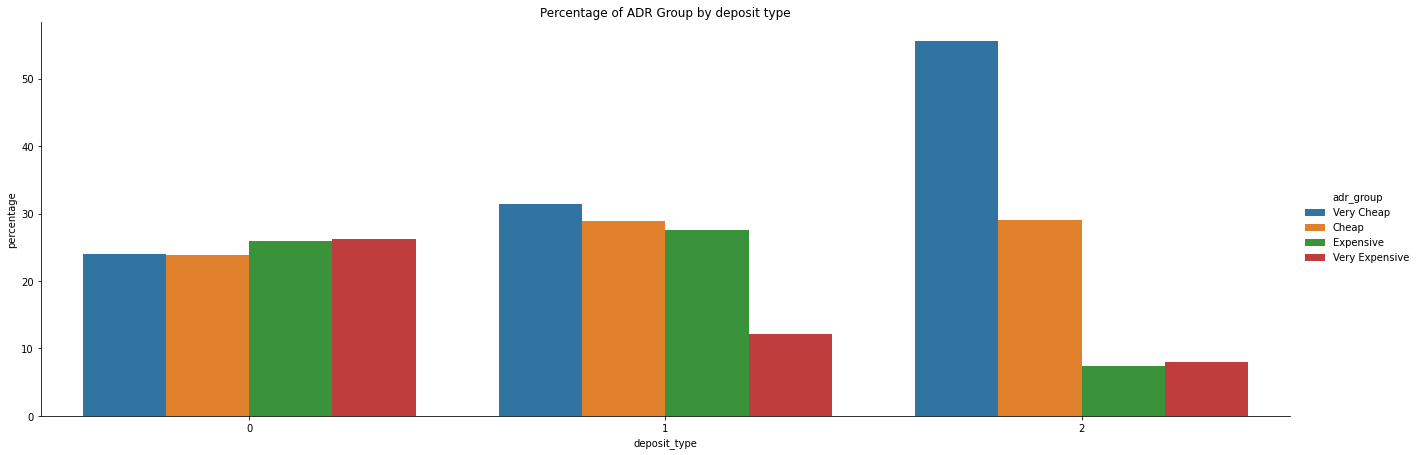

In [63]:
(hotel_bookings_transform
.groupby('deposit_type')['adr_group']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='deposit_type',y='percentage',hue='adr_group',kind='bar', height=6, aspect=3))
plt.title("Percentage of ADR Group by deposit type")

### Joint Plots for ADR

&emsp; To explore the joint plot on ADR, we first drop the data with ADR with 5400 as this is outlier breaks the graph, especially histogram, so we can display clear joint plots

In [64]:
hotel_bookings_transform.drop(48515, inplace=True)

Text(0.5, 1.0, 'Percentage of ADR Group by deposit type')

<Figure size 1152x432 with 0 Axes>

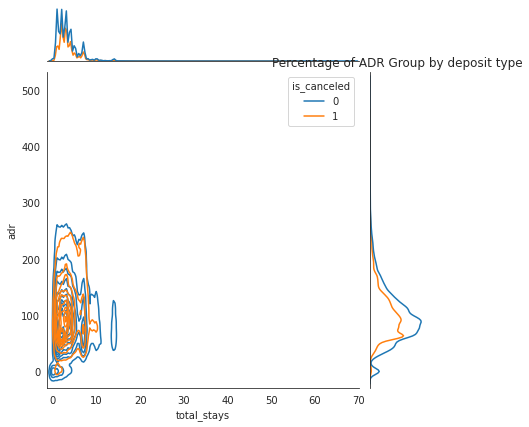

In [65]:
plt.figure(figsize=(16,6))

with sns.axes_style('white'):
    sns.jointplot(data=hotel_bookings_transform, x="total_stays", y="adr", kind='kde', hue="is_canceled")
    
plt.title("Percentage of ADR Group by deposit type")

&emsp; We explore the ADR and total stays with Joint plots, and then we add is_canceled for our class label to display the differences of it. The histogram on the top shows the distribution of the total stays and it is highly skewed to right. The histogram to the right shows the distribution of the ADR and it is highly skewed to left. Kernel Density Plot shows the density of two attributes we can see it is mostly clustered on region where the total stays are at 2 to 4 which is 25% and 75% quartiles and adr is at 69 to 126 which is 2%5 to 75% quartiles. This region matches with the histograms of two attributes on top and right. From the density graph, we can also identify that the histogram of non canceled (is_canceled = 0) spread more that total stays are displayed up to 20. From both histograms, adr and total_stays on canceled booking are less than those of non canceled booking. We are able to explore various analysis on the two attributes in one joint plots.

<Figure size 1152x432 with 0 Axes>

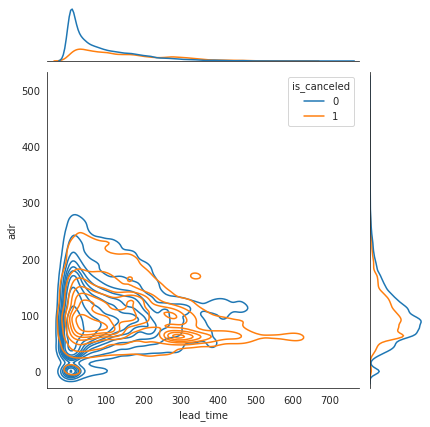

In [66]:
plt.figure(figsize=(16,6))

with sns.axes_style('white'):
    sns.jointplot(data=hotel_bookings_transform, x="lead_time", y="adr", kind='kde', hue="is_canceled")

&emsp; We explore the ADR and total stays with Joint plots, and then we add is_canceled for our class label to display the differences of it. Similarly with the above joint plot, the histogram on the top shows the distribution of the lead time and it is highly skewed to right. The histogram to the right shows the distribution of the ADR and it is highly skewed to left. Kernel Density Plot shows the density of two attributes we can see it is mostly clustered on region where the lead time is at 18 to 160 which is 25% and 75% quartiles and adr is at 69 to 126 which is 2%5 to 75% quartiles. This region matches with the histograms of two attributes on top and right. From the density graph, we can also identify that the histogram of lead time on canceled booking are spread more to the right, so we can understand that there are more cancellation when lead time is higher. From both histograms, adr and lead time on canceled booking are generally less than those of non canceled booking.

## New Features

**1. Number of rooms**

In our data, the number of guests are from 1 to 50s and we only have room type information on where they are assigned. Our dataset only shows the total number of guests per booking, but it does not break down the total number of rooms, this can have a big impact on our findings. They might booked multiple rooms and they might be all different types. It is also possible that not all the guest in the group stayed at the hotel, thus affecting other metrics. The number of rooms could help get us more insights on cancellation and ADR.

**2. Difference in Reserved Room and Assigned Room**

When the reserved rooms are different from the rooms that are actually assigned, guests might not be satisifed and this could lead to potential cancellation. We can create a new binary feature by assigning 0 if those two attributes match and 1 if not matching. Combining this new feature with our target feature, we can see if that feature affects the cancellation rate of booking.

**3. Age of guests**

Depending on age groups, their cancellation rate and target ADR might be different. Young guests will prefer the lower cost hotel rooms and older guests may be more careful with when scheduling booking thus reducing cancellation rates.  Knowledge of age group would allow us to explore these questions and better understand booking behavior.

**4. Satisfaction/Rates on hotel stays**

Previous experience affects the decision on next visit. When the guests have bad experiences they might be more likely to be less hesitant in cancelling their reservations. Customer satisfaction or rates will affects other guests decisions as well which could affect ADR. Adding this attribute could help with predicting ADR or cancellation. 

## Exceptional work - Logistic regression
&emsp; Additionally, we decided to run a logistic regression on is_cancelled, which is one of our variables of interest to target for classification. We wanted to see which components appeared to be the most significant. The first run we did most the attributes, the second, we removed the least significant and re-ran the regression. We concluded that Lead Time, Total Special Request, Previous Cancellations, Booking Changes, and  Market Segment were the most significant.


&emsp; Lastly, we ran a recursive feature elimination which to select the top 5 features to be the most relevant to predicting is_cancelled. The features chosen were number of adults, is repeated guest, previous cancellations, days in waiting list and total of special requests


In [67]:
hotel_bookings_transform.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [68]:
import statsmodels.api as sm

log_reg = sm.Logit(hotel_bookings_transform['is_canceled'], sm.add_constant(hotel_bookings_transform[
['hotel']
+['lead_time']
+['arrival_date_year']
+['arrival_date_month']
+['arrival_date_week_number']
+['arrival_date_day_of_month']
+['stays_in_weekend_nights']
+['stays_in_week_nights']
+['adults']
+['children']
+['babies']
+['meal']
+['market_segment']
+['distribution_channel']
+['is_repeated_guest']
+['previous_cancellations']
+['previous_bookings_not_canceled']
+['reserved_room_type']
+['assigned_room_type']
+['booking_changes']
+['deposit_type']
+['days_in_waiting_list']
+['customer_type']
+['adr']
+['total_of_special_requests']
+['reservation_status']
])).fit()

log_reg.summary2()
#hotel_bookings.info()





Optimization terminated successfully.
         Current function value: 0.129801
         Iterations 13


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
==================================================================================
Model:                     Logit                 Pseudo R-squared:      0.803     
Dependent Variable:        is_canceled           AIC:                   31047.5071
Date:                      2021-02-07 21:26      BIC:                   31309.1410
No. Observations:          119389                Log-Likelihood:        -15497.   
Df Model:                  26                    LL-Null:               -78698.   
Df Residuals:              119362                LLR p-value:           0.0000    
Converged:                 1.0000                Scale:                 1.0000    
No. Iterations:            13.0000                                                
----------------------------------------------------------------------------------
                                Coef.  Std.Err.     z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------------------
const                          47.8520  71.1480    0.6726 0.5012 -91.5955 187.2995
hotel                          -0.3983   0.0404   -9.8477 0.0000  -0.4775  -0.3190
lead_time                       0.0006   0.0002    3.1213 0.0018   0.0002   0.0011
arrival_date_year              -0.0221   0.0353   -0.6262 0.5312  -0.0913   0.0471
arrival_date_month             -0.0388   0.1866   -0.2077 0.8354  -0.4045   0.3270
arrival_date_week_number        0.0030   0.0429    0.0709 0.9435  -0.0810   0.0870
arrival_date_day_of_month       0.0035   0.0064    0.5414 0.5882  -0.0091   0.0161
stays_in_weekend_nights         0.0816   0.0199    4.1052 0.0000   0.0426   0.1206
stays_in_week_nights            0.0336   0.0104    3.2175 0.0013   0.0131   0.0540
adults                         -0.0647   0.0188   -3.4460 0.0006  -0.1015  -0.0279
children                        0.1286   0.0446    2.8847 0.0039   0.0412   0.2160
babies                          0.0473   0.1769    0.2675 0.7891  -0.2994   0.3940
meal                           -0.0196   0.0164   -1.1965 0.2315  -0.0518   0.0125
market_segment                  0.1260   0.0258    4.8774 0.0000   0.0754   0.1766
distribution_channel           -0.0755   0.0349   -2.1643 0.0304  -0.1438  -0.0071
is_repeated_guest              -0.1457   0.1308   -1.1145 0.2650  -0.4021   0.1106
previous_cancellations          0.2702   0.0398    6.7832 0.0000   0.1921   0.3483
previous_bookings_not_canceled -0.0608   0.0180   -3.3883 0.0007  -0.0960  -0.0256
reserved_room_type              0.1343   0.0217    6.1821 0.0000   0.0917   0.1769
assigned_room_type             -0.1493   0.0199   -7.5191 0.0000  -0.1882  -0.1104
booking_changes                -0.1883   0.0278   -6.7837 0.0000  -0.2427  -0.1339
deposit_type                    1.7196   0.0730   23.5623 0.0000   1.5766   1.8627
days_in_waiting_list           -0.0030   0.0010   -2.8584 0.0043  -0.0050  -0.0009
customer_type                  -0.1219   0.0308   -3.9562 0.0001  -0.1823  -0.0615
adr                             0.0009   0.0004    1.9625 0.0497   0.0000   0.0018
total_of_special_requests      -0.3140   0.0237  -13.2524 0.0000  -0.3604  -0.2676
reservation_status             -6.4712   0.0374 -173.0143 0.0000  -6.5445  -6.3979
==================================================================================

"""

In [69]:
log_reg = sm.Logit(hotel_bookings_transform['is_canceled'], sm.add_constant(hotel_bookings_transform[
['hotel']
+['lead_time']
+['adults']
+['children']
+['market_segment']
+['distribution_channel']
+['previous_cancellations']
+['previous_bookings_not_canceled']
+['reserved_room_type']
+['assigned_room_type']
+['booking_changes']
+['deposit_type']
+['days_in_waiting_list']
+['customer_type']
+['total_of_special_requests']
+['reservation_status']
])).fit()

log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.130110
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
================================================================================
Model:                   Logit                 Pseudo R-squared:      0.803     
Dependent Variable:      is_canceled           AIC:                   31101.3818
Date:                    2021-02-07 21:26      BIC:                   31266.1143
No. Observations:        119389                Log-Likelihood:        -15534.   
Df Model:                16                    LL-Null:               -78698.   
Df Residuals:            119372                LLR p-value:           0.0000    
Converged:               1.0000                Scale:                 1.0000    
No. Iterations:          8.0000                                                 
--------------------------------------------------------------------------------
                                Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------
const                           3.3155   0.1231   26.9285 0.0000  3.0741  3.5568
hotel                          -0.3431   0.0382   -8.9901 0.0000 -0.4179 -0.2683
lead_time                       0.0008   0.0002    4.3504 0.0000  0.0005  0.0012
adults                         -0.0615   0.0190   -3.2299 0.0012 -0.0988 -0.0242
children                        0.1403   0.0432    3.2490 0.0012  0.0557  0.2249
market_segment                  0.1325   0.0251    5.2888 0.0000  0.0834  0.1816
distribution_channel           -0.0652   0.0342   -1.9078 0.0564 -0.1321  0.0018
previous_cancellations          0.2600   0.0388    6.7092 0.0000  0.1841  0.3360
previous_bookings_not_canceled -0.0697   0.0172   -4.0579 0.0000 -0.1033 -0.0360
reserved_room_type              0.1621   0.0208    7.7913 0.0000  0.1213  0.2029
assigned_room_type             -0.1600   0.0196   -8.1442 0.0000 -0.1985 -0.1215
booking_changes                -0.1776   0.0278   -6.3819 0.0000 -0.2321 -0.1231
deposit_type                    1.7228   0.0725   23.7787 0.0000  1.5808  1.8648
days_in_waiting_list           -0.0032   0.0010   -3.1206 0.0018 -0.0053 -0.0012
customer_type                  -0.1484   0.0303   -4.8901 0.0000 -0.2079 -0.0889
total_of_special_requests      -0.3128   0.0235  -13.3242 0.0000 -0.3588 -0.2668
reservation_status             -6.4600   0.0370 -174.5241 0.0000 -6.5325 -6.3874
================================================================================

"""

In [70]:
#code modified from https://machinelearningmastery.com/feature-selection-machine-learning-python/

from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

array = hotel_bookings_transform[['hotel'
,'lead_time'
,'arrival_date_year'
,'arrival_date_month'
,'arrival_date_week_number'
,'arrival_date_day_of_month'
,'stays_in_weekend_nights'
,'stays_in_week_nights'
,'adults'
,'children'
,'babies'
,'meal'
,'market_segment'
,'distribution_channel'
,'is_repeated_guest'
,'previous_cancellations'
,'previous_bookings_not_canceled'
,'reserved_room_type'
,'assigned_room_type'
,'booking_changes'
,'days_in_waiting_list'
,'customer_type'
,'adr'
,'total_of_special_requests'
,'reservation_status']].values


X = array[:,0:24]
Y = array[:,24]
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [False False False False False False False False  True False False False
 False False  True  True False False False False  True False False  True]
Feature Ranking: [ 5 17 20 11 14 19 10 15  1  9 18 13 12  6  1  1  4  3  2  7  1  8 16  1]


## Exceptional work - Dimensionality reduction using Factor analysis of mixed data (FAMD)
### This technique is useful for a datset that contains both categorical and numerical features. 

&emsp;   1. Standardization of the both categorical and numeric variables is very important for FAMD. This is automatically done by the package “prince”. 

&emsp;    2. We deleted the following three features “country”,”agent” and ”company” due to errors while fitting FADM and ran the analysis on the rest of the features except the target feature “is_canceled”. 

&emsp;    3. Here inertia means the same as the “explained variance”. Unfortunately, the resulting numbers of the first two components were very low.  This most likely has to do with scaling categorical variables and fitting them with numerical variables. We will keep investigating the cause of this error and resolve the issue.

In [71]:
import pandas as pd
import prince
import pprint
from prince import FAMD

ModuleNotFoundError: No module named 'prince'

In [ ]:
del hotel_bookings['company']
del hotel_bookings['agent']

In [ ]:
# Encoding some features
hotel_bookings["is_canceled"]=hotel_bookings["is_canceled"].astype(str)
hotel_bookings["is_repeated_guest"]=hotel_bookings["is_repeated_guest"].astype(str)
hotel_bookings["distribution_channel"]=hotel_bookings["distribution_channel"].astype(str)
hotel_bookings["previous_cancellations"]=hotel_bookings["previous_cancellations"].astype(str)
hotel_bookings["reserved_room_type"]=hotel_bookings["reserved_room_type"].astype(str)
hotel_bookings["deposit_type"]=hotel_bookings["deposit_type"].astype(str)
hotel_bookings["market_segment"]=hotel_bookings["market_segment"].astype(str)
hotel_bookings["meal"]=hotel_bookings["meal"].astype(str)
hotel_bookings["assigned_room_type"]=hotel_bookings["assigned_room_type"].astype(str)
hotel_bookings["customer_type"]=hotel_bookings["customer_type"].astype(str)
hotel_bookings["reservation_status"]=hotel_bookings["reservation_status"].astype(str)

In [ ]:
# Turning all the categorical features into object features for FAMD processing

hotel_bookings.loc[:, hotel_bookings.dtypes == 'category'] =\
    hotel_bookings.select_dtypes(['category'])\
    .apply(lambda x: x.astype('object'))

hotel_bookings.info()

In [ ]:
# Instantiate FAMD object
famd = FAMD(n_components =30, n_iter = 5, random_state = 101)

In [ ]:
# Fit FAMD to the data
famd = famd.fit(hotel_bookings.drop('is_canceled', axis=1)) # Exclude target variable "is_canceled"

In [ ]:
famd.transform(hotel_bookings)

In [ ]:
# FAMD plot
ax = famd.plot_row_coordinates(hotel_bookings,color_labels=['is_canceled {}'.format(t) for t in hotel_bookings['is_canceled']] )

In [ ]:
# Principal dimensions results
pp = pprint.PrettyPrinter()
pp.pprint(famd.explained_inertia_) 